In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set the display options to show all columns, rows and overrride scientific notation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x : '%.2f' %x)

In [2]:
# importing data
mtn_data = pd.read_csv('Merchant Data API 05.05.2023.csv')
# mtn_data = pd.read_csv('Merchant data 29-11-2023.csv')

mtn_data.head()

/tmp/ipykernel_2982/1011114560.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  mtn_data = pd.read_csv('Merchant Data API 05.05.2023.csv')


,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,20220606.00,MTNU MoMoPay Chain Stores,16/06/2022 18:50,04/05/2023 21:17,NaN,04/05/2023 23:29,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,04/05/2023 21:17,3852140.00,NaN,NaN,NaN,NaN,19.00,12.00,4.00,1.00,NaN,NaN,NaN,NaN,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,NaN,NaN,NaN,14.00,4.00,1.00
1,616862@momopay,256770624321,257D69261D4092DA729EDA6424DA0CACBB1E1A2772ABCB...,BUSINESS,NRIN,NaN,NaN,ELIVIA PHARMACEUTICALS LTD,ELIVIA PHARMACEUTICALS,LTD,NaN,NaN,20220114.00,MTNU MoMoPay Standard,19/01/2022 16:41,04/05/2023 22:21,NaN,04/05/2023 23:12,3.00,463.00,253.00,92.00,4.00,52008699.00,29162900.00,8878450.00,214500.00,205.00,116.00,58.00,4.00,1500000.00,1500000.00,723200.00,105000.00,04/05/2023 22:21,6265791.00,NaN,NaN,NaN,NaN,145.00,99.00,33.00,2.00,NaN,NaN,NaN,NaN,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,NaN,21.00,6.00,3.00
2,672323@momopay,256776910570,D86CA88CE1E4DF0245422C7B803BF7EC,BUSINESS,NRIN,NaN,8.002E+13,BAKAMAI MEDICAL CENTRE LTD BAKAMAI MEDICAL CEN...,BAKAMAI MEDICAL CENTRE LTD,BAKAMAI MEDICAL CENTRE LTD,NaN,NaN,20221124.00,MTNU MoMoPay Standard,06/12/2022 22:24,04/05/2023 20:35,NaN,04/05/2023 22:51,2.00,227.00,158.00,44.00,2.00,51382800.00,40757800.00,7351500.00,660000.00,93.00,67.00,26.00,2.00,4700000.00,4700000.00,1000000.00,620000.00,04/05/2023 20:35,10211929.00,NaN,NaN,NaN,NaN,151.00,119.00,30.00,2.00,NaN,NaN,NaN,NaN,51059645.00,40604785.00,7323083.00,660000.00,98.00,67.00,12.00,1.00,38326500.00,31805000.00,5190000.00,620000.00,75.00,17.00,9.00
3,627947@momopay,256770863238,229EB09A263CB6E95A3636B655574E982B8C3E2DCAFF05...,BUSINESS,NRIN,NaN,NaN,MWES DAIRY FARM LIMITED,MWES DAIRY FARM,LIMITED,NaN,NaN,20220429.00,MTNU MoMoPay Oil and Gas,17/05/2022 12:46,04/05/2023 22:18,NaN,04/05/2023 22:46,3.00,328.00,163.00,60.00,2.00,103503000.00,56037600.00,21904400.00,126000.00,41.00,30.00,19.00,2.00,3516400.00,3516400.00,3020000.00,72000.00,04/05/2023 22:18,16772850.00,NaN,NaN,NaN,NaN,128.00,63.00,29.00,1.00,NaN,NaN,NaN,NaN,100637100.00,54615100.00,20660800.00,278000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00,26.00,5.00
4,142137@momopay,256787904645,2358DF75F5CC14

In [3]:
## converting date columns to datetime

date_cols  = [x for x in mtn_data.columns if ('date' or 'DATE') in x]



# dates to datetime
mtn_data['MoMoPay_fst_actvty_date'] = pd.to_datetime(mtn_data['MoMoPay_fst_actvty_date'], format = '%d/%m/%Y %H:%M')
mtn_data['date_last_receipt_into_momopay_wallet'] = pd.to_datetime(mtn_data['date_last_receipt_into_momopay_wallet'], format = '%d/%m/%Y %H:%M')
mtn_data['date_last_transfer_from_momopay_to_mobile_money'] = pd.to_datetime(mtn_data['date_last_transfer_from_momopay_to_mobile_money'], format = '%d/%m/%Y %H:%M')
mtn_data['date_last_transfer_from_momopay_to_bank'] = pd.to_datetime(mtn_data['date_last_transfer_from_momopay_to_bank'], format = '%d/%m/%Y %H:%M')
# mtn_data['MOM_momo_PAYMENT_LAST_DATE'] = pd.to_datetime(mtn_data['MOM_momo_PAYMENT_LAST_DATE'])
mtn_data['MOM_momo_PAYMENT_LAST_DATE'] = pd.to_datetime(mtn_data['MOM_momo_PAYMENT_LAST_DATE'], format='%d/%m/%Y %H:%M')

mtn_data['mom_registration_date'] = pd.to_datetime(mtn_data['mom_registration_date'], format='%Y%m%d')

mtn_data[date_cols].head(2)

# Columns containing 'date' or 'DATE' in their names
# date_cols = [x for x in mtn_data.columns if ('date' or 'DATE') in x]

# # Dates to datetime
# for col in date_cols:
#     # Use the correct format for each date column
#     if col == 'MoMoPay_fst_actvty_date':
#         mtn_data[col] = pd.to_datetime(mtn_data[col], format='%Y-%m-%d %H:%M:%S')
#     elif col in ['date_last_receipt_into_momopay_wallet', 'date_last_transfer_from_momopay_to_mobile_money', 'date_last_transfer_from_momopay_to_bank']:
#         mtn_data[col] = pd.to_datetime(mtn_data[col], format='%Y-%m-%d %H:%M:%S')
#     elif col == 'MOM_momo_PAYMENT_LAST_DATE':
#         mtn_data[col] = pd.to_datetime(mtn_data[col], format='%Y-%m-%d %H:%M:%S')
#     elif col == 'mom_registration_date':
#         mtn_data[col] = pd.to_datetime(mtn_data[col], format='%Y%m%d')

# # Display the first two rows of date columns
# mtn_data[date_cols].head(2)


,mom_registration_date,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank
0,2022-06-06,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00
1,2022-01-14,2022-01-19 16:41:00,2023-05-04 22:21:00,NaT,2023-05-04 23:12:00


In [4]:
## drop all rows with null merchant_code

mtn_data_copy = mtn_data.copy()


mtn_data = mtn_data.loc[mtn_data['kyc_merchant_code'].notnull()]


mtn_data.head(2)

,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,2022-06-06,MTNU MoMoPay Chain Stores,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,2023-05-04 21:17:00,3852140.00,NaN,NaN,NaN,NaN,19.00,12.00,4.00,1.00,NaN,NaN,NaN,NaN,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,NaN,NaN,NaN,14.00,4.00,1.00
1,616862@momopay,256770624321,257D69261D4092DA729EDA6424DA0CACBB1E1A2772ABCB...,BUSINESS,NRIN,NaN,NaN,ELIVIA PHARMACEUTICALS LTD,ELIVIA PHARMACEUTICALS,LTD,NaN,NaN,2022-01-14,MTNU MoMoPay Standard,2022-01-19 16:41:00,2023-05-04 22:21:00,NaT,2023-05-04 23:12:00,3.00,463.00,253.00,92.00,4.00,52008699.00,29162900.00,8878450.00,214500.00,205.00,116.00,58.00,4.00,1500000.00,1500000.00,723200.00,105000.00,2023-05-04 22:21:00,6265791.00,NaN,NaN,NaN,NaN,145.00,99.00,33.00,2.00,NaN,NaN,NaN,NaN,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,NaN,21.00,6.00,3.00


In [5]:
current_time = pd.to_datetime('05-05-2023')

print(current_time)

2023-05-05 00:00:00


In [6]:
## calculating time periods

# mtn_data['age_on_network_months'] = round((current_time - mtn_data['mom_registration_date'] ) / np.timedelta64(1, 'M') + 1)

# mtn_data['months_since_first_activity'] = round((current_time - mtn_data['MoMoPay_fst_actvty_date']) / np.timedelta64(1, 'M')) # + 1

# mtn_data['days_since_first_activity'] = round((current_time - mtn_data['MoMoPay_fst_actvty_date'] ) / np.timedelta64(1, 'D') + 1)

# mtn_data['days_btwn_joining_and_first_activity_date'] = round((mtn_data['MoMoPay_fst_actvty_date'] - mtn_data['mom_registration_date'] ) / np.timedelta64(1, 'D'))


# mtn_data['days_since_last_pay_in'] = round((current_time - mtn_data['date_last_receipt_into_momopay_wallet']) / np.timedelta64(1, 'D'))

# mtn_data['days_since_last_payout_to_mobile_money'] = round((current_time - mtn_data['date_last_transfer_from_momopay_to_mobile_money']) / np.timedelta64(1, 'D'))

# mtn_data['days_since_last_payout_to_bank'] = round((current_time - mtn_data['date_last_transfer_from_momopay_to_bank']) / np.timedelta64(1, 'D'))

# mtn_data.head(2)


## calculating time periods
mtn_data['age_on_network_months']= (round(
     ((current_time).year - mtn_data['mom_registration_date'].dt.year) * 12 +
      ((current_time).month - mtn_data['mom_registration_date'].dt.month),0)+1)
 

mtn_data['months_since_first_activity']= round(
     ((current_time).year - mtn_data['MoMoPay_fst_actvty_date'].dt.year) * 12 +
      ((current_time).month - mtn_data['MoMoPay_fst_actvty_date'].dt.month),0)
mtn_data['days_since_first_activity'] = round((current_time - mtn_data['MoMoPay_fst_actvty_date'] ) / np.timedelta64(1, 'D') + 1)

mtn_data['days_btwn_joining_and_first_activity_date'] = round((mtn_data['MoMoPay_fst_actvty_date'] - mtn_data['mom_registration_date'] ) / np.timedelta64(1, 'D'))


mtn_data['days_since_last_pay_in'] = round((current_time - mtn_data['date_last_receipt_into_momopay_wallet']) / np.timedelta64(1, 'D'))

mtn_data['days_since_last_payout_to_mobile_money'] = round((current_time - mtn_data['date_last_transfer_from_momopay_to_mobile_money']) / np.timedelta64(1, 'D'))

mtn_data['days_since_last_payout_to_bank'] = round((current_time - mtn_data['date_last_transfer_from_momopay_to_bank']) / np.timedelta64(1, 'D'))

mtn_data.head(2)

,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,2022-06-06,MTNU MoMoPay Chain Stores,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,2023-05-04 21:17:00,3852140.00,NaN,NaN,NaN,NaN,19.00,12.00,4.00,1.00,NaN,NaN,NaN,NaN,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,NaN,NaN,NaN,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,NaN,0.00
1,616862@momopay,256770624321,257D69261D4092DA729EDA6424DA0CACBB1E1A2772ABCB...,BUSINESS,NRIN,NaN,NaN,ELIVIA PHARMACEUTICALS LTD,ELIVIA PHARMACEUTICALS,LTD,NaN,NaN,2022-01-14,MTNU MoMoPay Standard,2022-01-19 16:41:00,2023-05-04 22:21:00,NaT,2023-05-04 23:12:00,3.00,463.00,253.00,92.00,4.00,52008699.00,29162900.00,8878450.00,214500.00,205.00,116.00,58.00,4.00,1500000.00,1500000.00,723200.00,105000.00,2023-05-04 22:21:00,6265791.00,NaN,NaN,NaN,NaN,145.00,99.00,33.00,2.00,NaN,NaN,NaN,NaN,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,NaN,21.00,6.00,3.00,17.00,16.00,471.00,6.00,0.00,NaN,0.00


In [7]:
def calculate_std(row):
    return np.std(row)

### Trading consistency

In [8]:
def calculate_trading_consistency(df):
    days_since_first_activity = df['days_since_first_activity']
    no_activity_last_30_days = df['MOMO_No_Activity_QTY_1M']
    no_activity_last_90_days = df['MOMO_No_Activity_QTY_3M']
    no_activity_last_180_days = df['MOMO_No_Activity_QTY_6M']
    
    
    if days_since_first_activity <= 30:
        no_of_extra_days = 30 - days_since_first_activity
        days_with_no_activity = no_activity_last_30_days - no_of_extra_days
        trading_consistency = round(1 - (days_with_no_activity / days_since_first_activity),2)
        return trading_consistency
    elif days_since_first_activity > 30 and days_since_first_activity <= 90 :
        no_of_extra_days = 90 - days_since_first_activity
        days_with_no_activity = no_activity_last_90_days - no_of_extra_days
        trading_consistency = round(1 - (days_with_no_activity / days_since_first_activity),2)
        return trading_consistency
    elif days_since_first_activity > 90 and days_since_first_activity <= 180 :
        no_of_extra_days = 180 - days_since_first_activity
        days_with_no_activity = no_activity_last_180_days - no_of_extra_days
        trading_consistency = round(1 - (days_with_no_activity / days_since_first_activity),2)
        return trading_consistency
    elif days_since_first_activity > 180:
        trading_consistency = round(1 - (no_activity_last_180_days / 180),2)
        return trading_consistency

In [9]:
mtn_data['trading_consistency'] = mtn_data.apply(lambda x : calculate_trading_consistency(x), axis = 1)

mtn_data.head(2)

,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,2022-06-06,MTNU MoMoPay Chain Stores,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,2023-05-04 21:17:00,3852140.00,NaN,NaN,NaN,NaN,19.00,12.00,4.00,1.00,NaN,NaN,NaN,NaN,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,NaN,NaN,NaN,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,NaN,0.00,0.92
1,616862@momopay,256770624321,257D69261D4092DA729EDA6424DA0CACBB1E1A2772ABCB...,BUSINESS,NRIN,NaN,NaN,ELIVIA PHARMACEUTICALS LTD,ELIVIA PHARMACEUTICALS,LTD,NaN,NaN,2022-01-14,MTNU MoMoPay Standard,2022-01-19 16:41:00,2023-05-04 22:21:00,NaT,2023-05-04 23:12:00,3.00,463.00,253.00,92.00,4.00,52008699.00,29162900.00,8878450.00,214500.00,205.00,116.00,58.00,4.00,1500000.00,1500000.00,723200.00,105000.00,2023-05-04 22:21:00,6265791.00,NaN,NaN,NaN,NaN,145.00,99.00,33.00,2.00,NaN,NaN,NaN,NaN,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,NaN,21.00,6.00,3.00,17.00,16.00,471.00,6.00,0.00,NaN,0.00,0.88


### Average daily transacted amount

In [10]:
def calculate_average_daily_amount_last_6_months(df):
    days_since_first_activity = df['days_since_first_activity']
    total_value_last_6_months = df['MOM_momo_PAYMENT_AMT_6M']
    
    if days_since_first_activity > 90 and days_since_first_activity <= 180:
        average_transaction_size_last_6_months = total_value_last_6_months / days_since_first_activity
        return average_transaction_size_last_6_months
    elif days_since_first_activity > 180 :
        average_transaction_size_last_6_months = total_value_last_6_months / 180
        return average_transaction_size_last_6_months

In [11]:
def calculate_average_daily_amount_last_3_months(df):
    days_since_first_activity = df['days_since_first_activity']
    total_value_last_3_months = df['MOM_momo_PAYMENT_AMT_3M']
    
    if days_since_first_activity > 30 and days_since_first_activity <= 90 :
        average_transaction_size_last_3_months = total_value_last_3_months / days_since_first_activity
        return average_transaction_size_last_3_months
    elif days_since_first_activity > 90 :
        average_transaction_size_last_3_months = total_value_last_3_months / 90
        return average_transaction_size_last_3_months

In [12]:
def calculate_average_daily_amount_last_1_months(df):
    days_since_first_activity = df['days_since_first_activity']
    total_value_last_1_months = df['MOM_momo_PAYMENT_AMT_1M']
    
    if days_since_first_activity <= 30 :
        average_transaction_size_last_1_months = total_value_last_1_months / days_since_first_activity
        return average_transaction_size_last_1_months
    elif days_since_first_activity > 30 :
        average_transaction_size_last_1_months = total_value_last_1_months / 30
        return average_transaction_size_last_1_months

In [13]:
mtn_data['average_daily_transacted_amount_last_6_months'] = mtn_data.apply(lambda x : calculate_average_daily_amount_last_6_months(x), axis = 1)

mtn_data['average_daily_transacted_amount_last_3_months'] = mtn_data.apply(lambda x : calculate_average_daily_amount_last_3_months(x), axis = 1)

mtn_data['average_daily_transacted_amount_last_1_months'] = mtn_data.apply(lambda x : calculate_average_daily_amount_last_1_months(x), axis = 1)

mtn_data.head(3)

,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,2022-06-06,MTNU MoMoPay Chain Stores,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,2023-05-04 21:17:00,3852140.00,NaN,NaN,NaN,NaN,19.00,12.00,4.00,1.00,NaN,NaN,NaN,NaN,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,NaN,NaN,NaN,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,NaN,0.00,0.92,106762.78,110822.22,103753.33
1,616862@momopay,256770624321,257D69261D4092DA729EDA6424DA0CACBB1E1A2772ABCB...,BUSINESS,NRIN,NaN,NaN,ELIVIA PHARMACEUTICALS LTD,ELIVIA PHARMACEUTICALS,LTD,NaN,NaN,2022-01-14,MTNU MoMoPay Standard,2022-01-19 16:41:00,2023-05-04 22:21:00,NaT,2023-05-04 23:12:00,3.00,463.00,253.00,92.00,4.00,52008699.00,29162900.00,8878450.00,214500.00,205.00,116.00,58.00,4.00,1500000.00,1500000.00,723200.00,105000.00,2023-05-04 22:21:00,6265791.00,NaN,NaN,NaN,NaN,145.00,99.00,33.00,2.00,NaN,NaN,NaN,NaN,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,NaN,21.00,6.00,3.00,17.00,16.00,471.00,6.00,0.00,NaN,0.00,0.88,288937.22,324032.22,295948.33
2,672323@momopay,256776910570,D86CA88CE1E4DF0245422C7B803BF7EC,BUSINESS,NRIN,NaN,8.002E+13,BAKAMAI MEDICAL CENTRE LTD BAKAMAI MEDICAL CEN...,BAKAMAI MEDICAL CENTRE LTD,BAKAMAI MEDICAL CENTRE LTD,NaN,NaN,2022-11-24,MTNU MoMoPay Standard,2022-12-06 22:24:00,2023-05-04 20:35:00,NaT,2023-05-04 22:51:00,2.00,227.00,158.00,44.00,2.00,51382800.00,40757800.00,7351500.00,660000.00,93.00,67.00,26.00,2.00,4700000.00,4700000.00,1000000.00,620000.00,2023-05-04 20:35:00,10211929.00,NaN,NaN,NaN,NaN,151.00,119.00,30.00,2.00,NaN,NaN,NaN,NaN,51059645.00,40604785.00,7323083.00,660000.00,98.00,67.00,12.00,1.00,38326500.00,31805000.00,5190000.00,620000.00,75.00,17.00,9.00,7.00,5.00,150.00,13.00,0.00,NaN,0.00,0.70,342552.00,452864.44,245050

In [14]:
mtn_data['ratio_average_daily_transacted_amount_last_1/6_months'] = round(mtn_data['average_daily_transacted_amount_last_1_months'] / mtn_data['average_daily_transacted_amount_last_6_months'],2)

mtn_data['ratio_average_daily_transacted_amount_last_1/3_months'] = round(mtn_data['average_daily_transacted_amount_last_1_months'] / mtn_data['average_daily_transacted_amount_last_3_months'],2)



mtn_data['ratio_average_daily_transacted_amount_last_3/6_months'] = round(mtn_data['average_daily_transacted_amount_last_3_months'] / mtn_data['average_daily_transacted_amount_last_6_months'],2)


mtn_data.head(2)

,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,2022-06-06,MTNU MoMoPay Chain Stores,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,2023-05-04 21:17:00,3852140.00,NaN,NaN,NaN,NaN,19.00,12.00,4.00,1.00,NaN,NaN,NaN,NaN,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,NaN,NaN,NaN,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,NaN,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04
1,616862@momopay,256770624321,257D69261D4092DA729EDA6424DA0CACBB1E1A2772ABCB...,BUSINESS,NRIN,NaN,NaN,ELIVIA PHARMACEUTICALS LTD,ELIVIA PHARMACEUTICALS,LTD,NaN,NaN,2022-01-14,MTNU MoMoPay Standard,2022-01-19 16:41:00,2023-05-04 22:21:00,NaT,2023-05-04 23:12:00,3.00,463.00,253.00,92.00,4.00,52008699.00,29162900.00,8878450.00,214500.00,205.00,116.00,58.00,4.00,1500000.00,1500000.00,723200.00,105000.00,2023-05-04 22:21:00,6265791.00,NaN,NaN,NaN,NaN,145.00,99.00,33.00,2.00,NaN,NaN,NaN,NaN,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,NaN,21.00,6.00,3.00,17.00,16.00,471.00,6.00,0.00,NaN,0.00,0.88,288937.22,324032.22,295948.33,1.02,0.91,1.12


In [15]:
mtn_data['std_average_daily_transacted_amount_last_1/6_months'] = mtn_data[['average_daily_transacted_amount_last_1_months','average_daily_transacted_amount_last_6_months']].apply(calculate_std, axis = 1)

mtn_data['std_average_daily_transacted_amount_last_1/3_months'] = mtn_data[['average_daily_transacted_amount_last_1_months','average_daily_transacted_amount_last_3_months']].apply(calculate_std, axis = 1)



mtn_data['std_average_daily_transacted_amount_last_3/6_months'] = mtn_data[['average_daily_transacted_amount_last_3_months','average_daily_transacted_amount_last_6_months']].apply(calculate_std, axis = 1)


mtn_data.head(2)

,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,2022-06-06,MTNU MoMoPay Chain Stores,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,2023-05-04 21:17:00,3852140.00,NaN,NaN,NaN,NaN,19.00,12.00,4.00,1.00,NaN,NaN,NaN,NaN,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,NaN,NaN,NaN,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,NaN,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,1504.72,3534.44,2029.72
1,616862@momopay,256770624321,257D69261D4092DA729EDA6424DA0CACBB1E1A2772ABCB...,BUSINESS,NRIN,NaN,NaN,ELIVIA PHARMACEUTICALS LTD,ELIVIA PHARMACEUTICALS,LTD,NaN,NaN,2022-01-14,MTNU MoMoPay Standard,2022-01-19 16:41:00,2023-05-04 22:21:00,NaT,2023-05-04 23:12:00,3.00,463.00,253.00,92.00,4.00,52008699.00,29162900.00,8878450.00,214500.00,205.00,116.00,58.00,4.00,1500000.00,1500000.00,723200.00,105000.00,2023-05-04 22:21:00,6265791.00,NaN,NaN,NaN,NaN,145.00,99.00,33.00,2.00,NaN,NaN,NaN,NaN,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,NaN,21.00,6.00,3.00,17.00,16.00,471.00,6.00,0.00,NaN,0.00,0.88,288937.22,324032.22,295948.33,1.02,0.91,1.12,3505.56,14041.94,17547.50


### Average transaction size

In [16]:
def calculate_average_transaction_size_last_6_months(df):
    days_since_first_activity = df['days_since_first_activity']
    total_value_last_6_months = df['MOM_momo_PAYMENT_AMT_6M']
    total_count_last_6_months = df['MOM_momo_PAYMENT_QTY_6M']
    
    if days_since_first_activity > 90: 
        if total_count_last_6_months == 0 :
            average_transaction_size_last_6_months = -4
            return average_transaction_size_last_6_months
        else:
            average_transaction_size_last_6_months = total_value_last_6_months / total_count_last_6_months
            return average_transaction_size_last_6_months

In [17]:
def calculate_average_transaction_size_last_3_months(df):
    days_since_first_activity = df['days_since_first_activity']
    total_value_last_3_months = df['MOM_momo_PAYMENT_AMT_3M']
    total_count_last_3_months = df['MOM_momo_PAYMENT_QTY_3M']
    
    if days_since_first_activity > 30:
        if total_count_last_3_months == 0 :
            average_transaction_size_last_3_months = -4
            return average_transaction_size_last_3_months
        else:
            average_transaction_size_last_3_months = total_value_last_3_months / total_count_last_3_months
            return average_transaction_size_last_3_months

In [18]:
def calculate_average_transaction_size_last_1_months(df):
    days_since_first_activity = df['days_since_first_activity']
    total_value_last_1_months = df['MOM_momo_PAYMENT_AMT_1M']
    total_count_last_1_months = df['MOM_momo_PAYMENT_QTY_1M']
    
    if total_count_last_1_months == 0:
        average_transaction_size_last_1_months = -4
        return average_transaction_size_last_1_months
    else:
        average_transaction_size_last_1_months = total_value_last_1_months / total_count_last_1_months
        return average_transaction_size_last_1_months

In [19]:
mtn_data['average_transaction_size_last_6_months'] = mtn_data.apply(lambda x : calculate_average_transaction_size_last_6_months(x), axis = 1)

mtn_data['average_transaction_size_last_3_months'] = mtn_data.apply(lambda x : calculate_average_transaction_size_last_3_months(x), axis = 1)

mtn_data['average_transaction_size_last_1_months'] = mtn_data.apply(lambda x : calculate_average_transaction_size_last_1_months(x), axis = 1)


mtn_data.head(2)

,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,2022-06-06,MTNU MoMoPay Chain Stores,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,2023-05-04 21:17:00,3852140.00,NaN,NaN,NaN,NaN,19.00,12.00,4.00,1.00,NaN,NaN,NaN,NaN,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,NaN,NaN,NaN,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,NaN,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,1504.72,3534.44,2029.72,37978.85,36007.22,31761.22
1,616862@momopay,256770624321,257D69261D4092DA729EDA6424DA0CACBB1E1A2772ABCB...,BUSINESS,NRIN,NaN,NaN,ELIVIA PHARMACEUTICALS LTD,ELIVIA PHARMACEUTICALS,LTD,NaN,NaN,2022-01-14,MTNU MoMoPay Standard,2022-01-19 16:41:00,2023-05-04 22:21:00,NaT,2023-05-04 23:12:00,3.00,463.00,253.00,92.00,4.00,52008699.00,29162900.00,8878450.00,214500.00,205.00,116.00,58.00,4.00,1500000.00,1500000.00,723200.00,105000.00,2023-05-04 22:21:00,6265791.00,NaN,NaN,NaN,NaN,145.00,99.00,33.00,2.00,NaN,NaN,NaN,NaN,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,NaN,21.00,6.00,3.00,17.00,16.00,471.00,6.00,0.00,NaN,0.00,0.88,288937.22,324032.22,295948.33,1.02,0.91,1.12,3505.56,14041.94,17547.50,112329.80,115268.38,96504.89


In [20]:
mtn_data['ratio_average_trxn_size_last_1/6_months'] = round(mtn_data['average_transaction_size_last_1_months'] / mtn_data['average_transaction_size_last_6_months'],2)

mtn_data['ratio_average_trxn_size_last_1/3_months'] = round(mtn_data['average_transaction_size_last_1_months'] / mtn_data['average_transaction_size_last_3_months'],2)



mtn_data['ratio_average_trxn_size_last_3/6_months'] = round(mtn_data['average_transaction_size_last_3_months'] / mtn_data['average_transaction_size_last_6_months'],2)


mtn_data.head(2)

,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,2022-06-06,MTNU MoMoPay Chain Stores,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,2023-05-04 21:17:00,3852140.00,NaN,NaN,NaN,NaN,19.00,12.00,4.00,1.00,NaN,NaN,NaN,NaN,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,NaN,NaN,NaN,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,NaN,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,1504.72,3534.44,2029.72,37978.85,36007.22,31761.22,0.84,0.88,0.95
1,616862@momopay,256770624321,257D69261D4092DA729EDA6424DA0CACBB1E1A2772ABCB...,BUSINESS,NRIN,NaN,NaN,ELIVIA PHARMACEUTICALS LTD,ELIVIA PHARMACEUTICALS,LTD,NaN,NaN,2022-01-14,MTNU MoMoPay Standard,2022-01-19 16:41:00,2023-05-04 22:21:00,NaT,2023-05-04 23:12:00,3.00,463.00,253.00,92.00,4.00,52008699.00,29162900.00,8878450.00,214500.00,205.00,116.00,58.00,4.00,1500000.00,1500000.00,723200.00,105000.00,2023-05-04 22:21:00,6265791.00,NaN,NaN,NaN,NaN,145.00,99.00,33.00,2.00,NaN,NaN,NaN,NaN,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,NaN,21.00,6.00,3.00,17.00,16.00,471.00,6.00,0.00,NaN,0.00,0.88,288937.22,324032.22,295948.33,1.02,0.91,1.12,3505.56,14041.94,17547.50,112329.80,115268.38,96504.89,0.86,0.84,1.03


In [21]:
mtn_data['std_average_trxn_size_last_1/6_months'] = mtn_data[['average_transaction_size_last_1_months','average_transaction_size_last_6_months']].apply(calculate_std, axis = 1)

mtn_data['std_average_trxn_size_last_1/3_months'] = mtn_data[['average_transaction_size_last_1_months','average_transaction_size_last_3_months']].apply(calculate_std, axis = 1)



mtn_data['std_average_trxn_size_last_3/6_months'] = mtn_data[['average_transaction_size_last_3_months','average_transaction_size_last_6_months']].apply(calculate_std, axis = 1)


mtn_data.head(2)

,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months,std_average_trxn_size_last_1/6_months,std_average_trxn_size_last_1/3_months,std_average_trxn_size_last_3/6_months
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,2022-06-06,MTNU MoMoPay Chain Stores,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,2023-05-04 21:17:00,3852140.00,NaN,NaN,NaN,NaN,19.00,12.00,4.00,1.00,NaN,NaN,NaN,NaN,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,NaN,NaN,NaN,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,NaN,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,1504.72,3534.44,2029.72,37978.85,36007.22,31761.22,0.84,0.88,0.95,3108.81,2123.00,985.82
1,616862@momopay,256770624321,257D69261D4092DA729EDA6424DA0CACBB1E1A2772ABCB...,BUSINESS,NRIN,NaN,NaN,ELIVIA PHARMACEUTICALS LTD,ELIVIA PHARMACEUTICALS,LTD,NaN,NaN,2022-01-14,MTNU MoMoPay Standard,2022-01-19 16:41:00,2023-05-04 22:21:00,NaT,2023-05-04 23:12:00,3.00,463.00,253.00,92.00,4.00,52008699.00,29162900.00,8878450.00,214500.00,205.00,116.00,58.00,4.00,1500000.00,1500000.00,723200.00,105000.00,2023-05-04 22:21:00,6265791.00,NaN,NaN,NaN,NaN,145.00,99.00,33.00,2.00,NaN,NaN,NaN,NaN,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,NaN,21.00,6.00,3.00,17.00,16.00,471.00,6.00,0.00

### Count of transactions

In [22]:
def calculate_count_of_transactions_last_6_months(df):
    days_since_first_activity = df['days_since_first_activity']
    total_count_last_6_months = df['MOM_momo_PAYMENT_QTY_6M']
    
    if days_since_first_activity > 90 :
        return total_count_last_6_months

In [23]:
def calculate_average_daily_transactions_last_6_months(df):
    days_since_first_activity = df['days_since_first_activity']
    count_of_transactions_last_6_months = df['count_of_transactions_last_6_months']
    
    
    if days_since_first_activity <= 180:
        average_daily_transactions_last_6_months = np.ceil(count_of_transactions_last_6_months / days_since_first_activity)
        return average_daily_transactions_last_6_months
    elif days_since_first_activity > 180:
        average_daily_transactions_last_6_months = np.ceil(count_of_transactions_last_6_months / 180)
        return average_daily_transactions_last_6_months
    else: 
        return -4

In [24]:
def calculate_count_of_transactions_last_3_months(df):
    days_since_first_activity = df['days_since_first_activity']
    total_count_last_3_months = df['MOM_momo_PAYMENT_QTY_3M']
    
    if days_since_first_activity > 30 :
        return total_count_last_3_months

In [25]:
def calculate_average_daily_transactions_last_3_months(df):
    days_since_first_activity = df['days_since_first_activity']
    count_of_transactions_last_3_months = df['count_of_transactions_last_3_months']
    
    
    if days_since_first_activity <= 90:
        average_daily_transactions_last_3_months = np.ceil(count_of_transactions_last_3_months / days_since_first_activity)
        return average_daily_transactions_last_3_months
    elif days_since_first_activity > 90:
        average_daily_transactions_last_3_months = np.ceil(count_of_transactions_last_3_months / 90)
        return average_daily_transactions_last_3_months
    else:
        return -4

In [26]:
def calculate_count_of_transactions_last_1_months(df):
    days_since_first_activity = df['days_since_first_activity']
    total_count_last_1_months = df['MOM_momo_PAYMENT_QTY_1M']
    
    return total_count_last_1_months

In [27]:
def calculate_average_daily_transactions_last_1_months(df):
    days_since_first_activity = df['days_since_first_activity']
    count_of_transactions_last_1_months = df['count_of_transactions_last_1_months']
    
    
    if days_since_first_activity <= 30:
        average_daily_transactions_last_1_months = np.ceil(count_of_transactions_last_1_months / days_since_first_activity)
        return average_daily_transactions_last_1_months
    elif days_since_first_activity > 30:
        average_daily_transactions_last_1_months = np.ceil(count_of_transactions_last_1_months / 30)
        return average_daily_transactions_last_1_months
    else:
        return -4

In [28]:
mtn_data['count_of_transactions_last_6_months'] = mtn_data.apply(lambda x : calculate_count_of_transactions_last_6_months(x), axis = 1)

mtn_data['count_of_transactions_last_3_months'] = mtn_data.apply(lambda x : calculate_count_of_transactions_last_3_months(x), axis = 1)

mtn_data['count_of_transactions_last_1_months'] = mtn_data.apply(lambda x : calculate_count_of_transactions_last_1_months(x), axis = 1)

mtn_data.head(3)

,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months,std_average_trxn_size_last_1/6_months,std_average_trxn_size_last_1/3_months,std_average_trxn_size_last_3/6_months,count_of_transactions_last_6_months,count_of_transactions_last_3_months,count_of_transactions_last_1_months
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,2022-06-06,MTNU MoMoPay Chain Stores,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,2023-05-04 21:17:00,3852140.00,NaN,NaN,NaN,NaN,19.00,12.00,4.00,1.00,NaN,NaN,NaN,NaN,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,NaN,NaN,NaN,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,NaN,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,1504.72,3534.44,2029.72,37978.85,36007.22,31761.22,0.84,0.88,0.95,3108.81,2123.00,985.82,506.00,277.00,98.00
1,616862@momopay,256770624321,257D69261D4092DA729EDA6424DA0CACBB1E1A2772ABCB...,BUSINESS,NRIN,NaN,NaN,ELIVIA PHARMACEUTICALS LTD,ELIVIA PHARMACEUTICALS,LTD,NaN,NaN,2022-01-14,MTNU MoMoPay Standard,2022-01-19 16:41:00,2023-05-04 22:21:00,NaT,2023-05-04 23:12:00,3.00,463.00,253.00,92.00,4.00,52008699.00,29162900.00,8878450.00,214500.00,205.00,116.00,58.00,4.00,1500000.00,1500000.00,723200.00,105000.00,2023-05-04 22:21:00,6265791.00,NaN,NaN,NaN,NaN,145.00,99.00,33.00,2.00,NaN,NaN,NaN,NaN,37594746.00,230

In [29]:
mtn_data['count_of_transactions_last_6_months'].fillna(-4, inplace = True)

mtn_data['count_of_transactions_last_3_months'].fillna(-4, inplace = True)

mtn_data['count_of_transactions_last_1_months'].fillna(-4, inplace = True)

In [30]:
mtn_data['average_daily_transactions_last_6_months'] = mtn_data.apply(lambda x : calculate_average_daily_transactions_last_6_months(x), axis = 1)

mtn_data['average_daily_transactions_last_3_months'] = mtn_data.apply(lambda x : calculate_average_daily_transactions_last_3_months(x), axis = 1)

mtn_data['average_daily_transactions_last_1_months'] = mtn_data.apply(lambda x : calculate_average_daily_transactions_last_1_months(x), axis = 1)

mtn_data.head(3)

,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months,std_average_trxn_size_last_1/6_months,std_average_trxn_size_last_1/3_months,std_average_trxn_size_last_3/6_months,count_of_transactions_last_6_months,count_of_transactions_last_3_months,count_of_transactions_last_1_months,average_daily_transactions_last_6_months,average_daily_transactions_last_3_months,average_daily_transactions_last_1_months
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,2022-06-06,MTNU MoMoPay Chain Stores,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,2023-05-04 21:17:00,3852140.00,NaN,NaN,NaN,NaN,19.00,12.00,4.00,1.00,NaN,NaN,NaN,NaN,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,NaN,NaN,NaN,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,NaN,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,1504.72,3534.44,2029.72,37978.85,36007.22,31761.22,0.84,0.88,0.95,3108.81,2123.00,985.82,506.00,277.00,98.00,3.00,4.00,4.00
1,616862@momopay,256770624321,257D69261D4092DA729EDA6424DA0CACBB1E1A2772ABCB...,BUSINESS,NRIN,NaN,NaN,ELIVIA PHARMACEUTICALS LTD,ELIVIA PHARMACEUTICALS,LTD,NaN,NaN,2022-01-14,MTNU MoMoPay Standard,2022-01-19 16:41:00,2023-05-04 22:21:00,NaT,2023-05-04 23:12:00,3.00,463.00,253.00,92.00,4.00,52008699.00,29162900.00,8878450.00,214500.00,205.00,116.00,58.00,4.00,150000

In [31]:
mtn_data['ratio_average_daily_transactions_last_1/6_months'] = round(mtn_data['average_daily_transactions_last_1_months'] / mtn_data['average_daily_transactions_last_6_months'],2)

mtn_data['ratio_average_daily_transactions_last_1/3_months'] = round(mtn_data['average_daily_transactions_last_1_months'] / mtn_data['average_daily_transactions_last_3_months'],2)



mtn_data['ratio_average_daily_transactions_last_3/6_months'] = round(mtn_data['average_daily_transactions_last_3_months'] / mtn_data['average_daily_transactions_last_6_months'],2)


mtn_data.head(2)

,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months,std_average_trxn_size_last_1/6_months,std_average_trxn_size_last_1/3_months,std_average_trxn_size_last_3/6_months,count_of_transactions_last_6_months,count_of_transactions_last_3_months,count_of_transactions_last_1_months,average_daily_transactions_last_6_months,average_daily_transactions_last_3_months,average_daily_transactions_last_1_months,ratio_average_daily_transactions_last_1/6_months,ratio_average_daily_transactions_last_1/3_months,ratio_average_daily_transactions_last_3/6_months
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,2022-06-06,MTNU MoMoPay Chain Stores,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,2023-05-04 21:17:00,3852140.00,NaN,NaN,NaN,NaN,19.00,12.00,4.00,1.00,NaN,NaN,NaN,NaN,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,NaN,NaN,NaN,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,NaN,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,1504.72,3534.44,2029.72,37978.85,36007.22,31761.22,0.84,0.88,0.95,3108.81,2123.00,985.82,506.00,277.00,98.00,3.00,4.00,4.00,1.33,1.00,1.33
1,616862@momopay,256770624321,257D69261D4092DA729EDA6424DA0CACBB1E1A2772ABCB...,BUSINESS,NRIN,NaN,NaN,ELIVIA PHARMACEUTICALS LTD,ELIVIA PHARMACEUTICALS,LTD,NaN,NaN,2022-01-14,MTNU MoMoPay Standard,2022-01-

In [32]:
mtn_data['std_average_daily_transactions_last_1/6_months'] = mtn_data[['average_daily_transactions_last_1_months','average_daily_transactions_last_3_months']].apply(calculate_std, axis = 1)

mtn_data['std_average_daily_transactions_last_1/3_months'] = mtn_data[['average_daily_transactions_last_1_months','average_daily_transactions_last_3_months']].apply(calculate_std, axis = 1)



mtn_data['std_average_daily_transactions_last_3/6_months'] = mtn_data[['average_daily_transactions_last_3_months','average_daily_transactions_last_6_months']].apply(calculate_std, axis = 1)


mtn_data.head(2)

,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months,std_average_trxn_size_last_1/6_months,std_average_trxn_size_last_1/3_months,std_average_trxn_size_last_3/6_months,count_of_transactions_last_6_months,count_of_transactions_last_3_months,count_of_transactions_last_1_months,average_daily_transactions_last_6_months,average_daily_transactions_last_3_months,average_daily_transactions_last_1_months,ratio_average_daily_transactions_last_1/6_months,ratio_average_daily_transactions_last_1/3_months,ratio_average_daily_transactions_last_3/6_months,std_average_daily_transactions_last_1/6_months,std_average_daily_transactions_last_1/3_months,std_average_daily_transactions_last_3/6_months
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,2022-06-06,MTNU MoMoPay Chain Stores,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,2023-05-04 21:17:00,3852140.00,NaN,NaN,NaN,NaN,19.00,12.00,4.00,1.00,NaN,NaN,NaN,NaN,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,NaN,NaN,NaN,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,NaN,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,1504.72,3534.44,2029.72,37978.85,36007.22,31761.22,0.84,0.88,0.95,3108.81,2123.00,985.82,506.00,277.00,98.00,3.00,4.00,4.00,1.33,1.00,1.33,0.00,0.00,0.50
1,616862@momopay,256770624321,257D69261D4092DA729

### Number of clients served

In [33]:
def calculate_count_of_clients_last_6_months(df):
    days_since_first_activity = df['days_since_first_activity']
    total_clients_last_6_months = df['MOM_momo_PAYMENT_ACCEPTORS_6M']
    
    if days_since_first_activity > 90 :
        return total_clients_last_6_months

In [34]:
def calculate_average_daily_clients_last_6_months(df):
    days_since_first_activity = df['days_since_first_activity']
    count_of_clients_last_6_months = df['count_of_clients_last_6_months']
    
    
    if days_since_first_activity <= 180:
        average_daily_clients_last_6_months = np.ceil(count_of_clients_last_6_months / days_since_first_activity)
        return average_daily_clients_last_6_months
    elif days_since_first_activity > 180:
        average_daily_clients_last_6_months = np.ceil(count_of_clients_last_6_months / 180)
        return average_daily_clients_last_6_months
    else: 
        return -4

In [35]:
def calculate_count_of_clients_last_3_months(df):
    days_since_first_activity = df['days_since_first_activity']
    total_clients_last_3_months = df['MOM_momo_PAYMENT_ACCEPTORS_3M']
    
    if days_since_first_activity > 30 :
        return total_clients_last_3_months

In [36]:
def calculate_average_daily_clients_last_3_months(df):
    days_since_first_activity = df['days_since_first_activity']
    count_of_clients_last_3_months = df['count_of_clients_last_3_months']
    
    
    if days_since_first_activity <= 90:
        average_daily_clients_last_3_months = np.ceil(count_of_clients_last_3_months / days_since_first_activity)
        return average_daily_clients_last_3_months
    elif days_since_first_activity > 90:
        average_daily_clients_last_3_months = np.ceil(count_of_clients_last_3_months / 90)
        return average_daily_clients_last_3_months
    else: 
        return -4

In [37]:
def calculate_count_of_clients_last_1_months(df):
    days_since_first_activity = df['days_since_first_activity']
    total_clients_1_months = df['MOM_momo_PAYMENT_ACCEPTORS_1M']
    
    return total_clients_1_months

In [38]:
def calculate_average_daily_clients_last_1_months(df):
    days_since_first_activity = df['days_since_first_activity']
    count_of_clients_last_1_months = df['count_of_clients_last_1_months']
    
    
    if pd.notnull(count_of_clients_last_1_months):
        average_daily_clients_last_1_months = np.ceil(count_of_clients_last_1_months / days_since_first_activity)
        return average_daily_clients_last_1_months
    else:
        return -4

In [39]:
mtn_data['count_of_clients_last_6_months'] = mtn_data.apply(lambda x : calculate_count_of_clients_last_6_months(x), axis = 1)

mtn_data['count_of_clients_last_3_months'] = mtn_data.apply(lambda x : calculate_count_of_clients_last_3_months(x), axis = 1)

mtn_data['count_of_clients_last_1_months'] = mtn_data.apply(lambda x : calculate_count_of_clients_last_1_months(x), axis = 1)


mtn_data.head(3)

,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months,std_average_trxn_size_last_1/6_months,std_average_trxn_size_last_1/3_months,std_average_trxn_size_last_3/6_months,count_of_transactions_last_6_months,count_of_transactions_last_3_months,count_of_transactions_last_1_months,average_daily_transactions_last_6_months,average_daily_transactions_last_3_months,average_daily_transactions_last_1_months,ratio_average_daily_transactions_last_1/6_months,ratio_average_daily_transactions_last_1/3_months,ratio_average_daily_transactions_last_3/6_months,std_average_daily_transactions_last_1/6_months,std_average_daily_transactions_last_1/3_months,std_average_daily_transactions_last_3/6_months,count_of_clients_last_6_months,count_of_clients_last_3_months,count_of_clients_last_1_months
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,2022-06-06,MTNU MoMoPay Chain Stores,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,2023-05-04 21:17:00,3852140.00,NaN,NaN,NaN,NaN,19.00,12.00,4.00,1.00,NaN,NaN,NaN,NaN,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,NaN,NaN,NaN,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,NaN,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,1504.72,3534.44,2029.72,37978.85,36007.22,31761.22,0.84,0.88,0.95,3108.81,2123.00,985.82,506.00,277.00,98.00,3

In [40]:
mtn_data['average_daily_clients_last_6_months'] = mtn_data.apply(lambda x : calculate_average_daily_clients_last_6_months(x), axis = 1)

mtn_data['average_daily_clients_last_3_months'] = mtn_data.apply(lambda x : calculate_average_daily_clients_last_3_months(x), axis = 1)

mtn_data['average_daily_clients_last_1_months'] = mtn_data.apply(lambda x : calculate_average_daily_clients_last_1_months(x), axis = 1)

mtn_data.head(3)

,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months,std_average_trxn_size_last_1/6_months,std_average_trxn_size_last_1/3_months,std_average_trxn_size_last_3/6_months,count_of_transactions_last_6_months,count_of_transactions_last_3_months,count_of_transactions_last_1_months,average_daily_transactions_last_6_months,average_daily_transactions_last_3_months,average_daily_transactions_last_1_months,ratio_average_daily_transactions_last_1/6_months,ratio_average_daily_transactions_last_1/3_months,ratio_average_daily_transactions_last_3/6_months,std_average_daily_transactions_last_1/6_months,std_average_daily_transactions_last_1/3_months,std_average_daily_transactions_last_3/6_months,count_of_clients_last_6_months,count_of_clients_last_3_months,count_of_clients_last_1_months,average_daily_clients_last_6_months,average_daily_clients_last_3_months,average_daily_clients_last_1_months
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,2022-06-06,MTNU MoMoPay Chain Stores,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,2023-05-04 21:17:00,3852140.00,NaN,NaN,NaN,NaN,19.00,12.00,4.00,1.00,NaN,NaN,NaN,NaN,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,NaN,NaN,NaN,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,NaN,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,15

In [41]:
mtn_data['ratio_average_daily_clients_last_1/6_months'] = round(mtn_data['average_daily_clients_last_1_months'] / mtn_data['average_daily_clients_last_6_months'],2)

mtn_data['ratio_average_daily_clients_last_1/3_months'] = round(mtn_data['average_daily_clients_last_1_months'] / mtn_data['average_daily_clients_last_3_months'],2)



mtn_data['ratio_average_daily_clients_last_3/6_months'] = round(mtn_data['average_daily_clients_last_3_months'] / mtn_data['average_daily_clients_last_6_months'],2)


mtn_data.head(2)

,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months,std_average_trxn_size_last_1/6_months,std_average_trxn_size_last_1/3_months,std_average_trxn_size_last_3/6_months,count_of_transactions_last_6_months,count_of_transactions_last_3_months,count_of_transactions_last_1_months,average_daily_transactions_last_6_months,average_daily_transactions_last_3_months,average_daily_transactions_last_1_months,ratio_average_daily_transactions_last_1/6_months,ratio_average_daily_transactions_last_1/3_months,ratio_average_daily_transactions_last_3/6_months,std_average_daily_transactions_last_1/6_months,std_average_daily_transactions_last_1/3_months,std_average_daily_transactions_last_3/6_months,count_of_clients_last_6_months,count_of_clients_last_3_months,count_of_clients_last_1_months,average_daily_clients_last_6_months,average_daily_clients_last_3_months,average_daily_clients_last_1_months,ratio_average_daily_clients_last_1/6_months,ratio_average_daily_clients_last_1/3_months,ratio_average_daily_clients_last_3/6_months
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,2022-06-06,MTNU MoMoPay Chain Stores,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,2023-05-04 21:17:00,3852140.00,NaN,NaN,NaN,NaN,19.00,12.00,4.00,1.00,NaN,NaN,NaN,NaN,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0

In [42]:
mtn_data['std_average_daily_clients_last_1/6_months'] = mtn_data[['average_daily_clients_last_1_months','average_daily_clients_last_6_months']].apply(calculate_std, axis = 1)

mtn_data['std_average_daily_clients_last_1/3_months'] = mtn_data[['average_daily_clients_last_1_months','average_daily_clients_last_3_months']].apply(calculate_std, axis = 1)



mtn_data['std_average_daily_clients_last_3/6_months'] = mtn_data[['average_daily_clients_last_3_months','average_daily_clients_last_6_months']].apply(calculate_std, axis = 1)


mtn_data.head(2)

,kyc_merchant_code,kyc_momo_account_number,id_number_ah,kyc_merchant_type,kyc_id_type,kyc_business_type,kyc_id_num,KYC_BUSINESS_NAME,KYC_FIRST_NAME,KYC_LAST_NAME,kyc_first_name_2,kyc_last_name_2,mom_registration_date,profile,MoMoPay_fst_actvty_date,date_last_receipt_into_momopay_wallet,date_last_transfer_from_momopay_to_mobile_money,date_last_transfer_from_momopay_to_bank,MOM_momo_TransactionsPerDay,MOM_momo_PAYMENT_QTY_6M,MOM_momo_PAYMENT_QTY_3M,MOM_momo_PAYMENT_QTY_1M,MOM_momo_PAYMENT_QTY_1D,MOM_momo_PAYMENT_AMT_6M,MOM_momo_PAYMENT_AMT_3M,MOM_momo_PAYMENT_AMT_1M,DAY_momo_PAYMENT_AMT,MOM_momo_PAYMENT_ACCEPTORS_6M,MOM_momo_PAYMENT_ACCEPTORS_3M,MOM_momo_PAYMENT_ACCEPTORS_1M,DAY_momo_PAYMENT_ACCEPTORS,MOM_momo_PAYMENT_MAX_AMT_6M,MOM_momo_PAYMENT_MAX_AMT_3M,MOM_momo_PAYMENT_MAX_AMT_1M,DAY_momo_PAYMENT_MAX_AMT,MOM_momo_PAYMENT_LAST_DATE,MOM_momo_Withdrawal,MOM_momo_Till_Wallet_QTY_6M,MOM_momo_Till_Wallet_QTY_3M,MOM_momo_Till_Wallet_QTY_1M,DAY_momo_Till_Wallet_QTY,MOM_momo_Till_Bank_QTY_6M,MOM_momo_Till_Bank_QTY_3M,MOM_momo_Till_Bank_QTY_1M,DAY_momo_Till_Bank_QTY,MOM_momo_Till_Wallet_AMT_6M,MOM_momo_Till_Wallet_AMT_3M,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months,std_average_trxn_size_last_1/6_months,std_average_trxn_size_last_1/3_months,std_average_trxn_size_last_3/6_months,count_of_transactions_last_6_months,count_of_transactions_last_3_months,count_of_transactions_last_1_months,average_daily_transactions_last_6_months,average_daily_transactions_last_3_months,average_daily_transactions_last_1_months,ratio_average_daily_transactions_last_1/6_months,ratio_average_daily_transactions_last_1/3_months,ratio_average_daily_transactions_last_3/6_months,std_average_daily_transactions_last_1/6_months,std_average_daily_transactions_last_1/3_months,std_average_daily_transactions_last_3/6_months,count_of_clients_last_6_months,count_of_clients_last_3_months,count_of_clients_last_1_months,average_daily_clients_last_6_months,average_daily_clients_last_3_months,average_daily_clients_last_1_months,ratio_average_daily_clients_last_1/6_months,ratio_average_daily_clients_last_1/3_months,ratio_average_daily_clients_last_3/6_months,std_average_daily_clients_last_1/6_months,std_average_daily_clients_last_1/3_months,std_average_daily_clients_last_3/6_months
0,635070@momopay,256776802727,BBA52A740FAD2FDEBC08BBB343B5749B,BUSINESS,NRIN,NaN,CERT_129947,PHARMACY CHOICE LIMITED,PHARMACY CHOICE,LIMITED,NaN,NaN,2022-06-06,MTNU MoMoPay Chain Stores,2022-06-16 18:50:00,2023-05-04 21:17:00,NaT,2023-05-04 23:29:00,3.00,506.00,277.00,98.00,3.00,19217300.00,9974000.00,3112600.00,112000.00,301.00,188.00,79.00,3.00,326000.00,255000.00,116000.00,52000.00,2023-05-04 21:17:00,3

In [43]:
mtn_data.fillna(-4, inplace = True)

mtn_data.replace([np.inf, -np.inf], 0, inplace = True)

/tmp/ipykernel_2982/3152060814.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-4' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  mtn_data.fillna(-4, inplace = True)


In [44]:
mtn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
kyc_momo_account_number,243935.00,256773399513.58,43483984.01,256312120022.00,256773295033.50,256778298988.00,256783687465.50,256999876874.00
kyc_business_type,243935.00,-4.00,0.00,-4.00,-4.00,-4.00,-4.00,-4.00
kyc_first_name_2,243935.00,-4.00,0.00,-4.00,-4.00,-4.00,-4.00,-4.00
kyc_last_name_2,243935.00,-4.00,0.00,-4.00,-4.00,-4.00,-4.00,-4.00
MOM_momo_TransactionsPerDay,243935.00,-1.27,9.01,-4.00,-4.00,-4.00,1.00,1908.00
MOM_momo_PAYMENT_QTY_6M,243935.00,29.06,766.77,-4.00,-4.00,-4.00,4.00,242830.00
MOM_momo_PAYMENT_QTY_3M,243935.00,15.52,416.28,-4.00,-4.00,-4.00,2.00,124296.00
MOM_momo_PAYMENT_QTY_1M,243935.00,4.27,158.93,-4.00,-4.00,-4.00,0.00,44316.00
MOM_momo_PAYMENT_QTY_1D,243935.00,-2.06,5.38,-4.00,-4.00,-4.00,0.00,1576.00
MOM_momo_PAYMENT_AMT_6M,243935.00,3072387.43,98835053.26,-4.00,-4.00,-4.00,10000.00,26707941857.00


### Beginning of modelling

In [45]:
mtn_data_derived_df = mtn_data.iloc[ : , list(range(0,2)) + list(range(47,99))]

mtn_data_derived_df.head(2)

,kyc_merchant_code,kyc_momo_account_number,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months,std_average_trxn_size_last_1/6_months,std_average_trxn_size_last_1/3_months,std_average_trxn_size_last_3/6_months,count_of_transactions_last_6_months,count_of_transactions_last_3_months,count_of_transactions_last_1_months,average_daily_transactions_last_6_months,average_daily_transactions_last_3_months,average_daily_transactions_last_1_months,ratio_average_daily_transactions_last_1/6_months,ratio_average_daily_transactions_last_1/3_months,ratio_average_daily_transactions_last_3/6_months
0,635070@momopay,256776802727,-4.00,-4.00,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,-4.00,-4.00,-4.00,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,-4.00,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,1504.72,3534.44,2029.72,37978.85,36007.22,31761.22,0.84,0.88,0.95,3108.81,2123.00,985.82,506.00,277.00,98.00,3.00,4.00,4.00,1.33,1.00,1.33
1,616862@momopay,256770624321,-4.00,-4.00,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,-4.00,21.00,6.00,3.00,17.00,16.00,471.00,6.00,0.00,-4.00,0.00,0.88,288937.22,324032.22,295948.33,1.02,0.91,1.12,3505.56,14041.94,17547.50,112329.80,115268.38,96504.89,0.86,0.84,1.03,7912.46,9381.74,1469.29,463.00,253.00,92.00,3.00,3.00,4.00,1.33,1.33,1.00


In [46]:
mtn_data_derived_df.columns


Index(['kyc_merchant_code', 'kyc_momo_account_number',
       'MOM_momo_Till_Wallet_AMT_1M', 'DAY_momo_Till_Wallet_AMT',
       'MOM_momo_Till_Bank_AMT_6M', 'MOM_momo_Till_Bank_AMT_3M',
       'MOM_momo_Till_Bank_AMT_1M', 'DAY_momo_Till_Bank_AMT',
       'MOM_momo_m2m_PAYMENT_QTY_6M', 'MOM_momo_m2m_PAYMENT_QTY_3M',
       'MOM_momo_m2m_PAYMENT_QTY_1M', 'DAY_momo_m2m_PAYMENT_QTY',
       'MOM_momo_m2m_PAYMENT_AMT_6M', 'MOM_momo_m2m_PAYMENT_AMT_3M',
       'MOM_momo_m2m_PAYMENT_AMT_1M', 'DAY_momo_m2m_PAYMENT_AMT',
       'MOMO_No_Activity_QTY_6M', 'MOMO_No_Activity_QTY_3M',
       'MOMO_No_Activity_QTY_1M', 'age_on_network_months',
       'months_since_first_activity', 'days_since_first_activity',
       'days_btwn_joining_and_first_activity_date', 'days_since_last_pay_in',
       'days_since_last_payout_to_mobile_money',
       'days_since_last_payout_to_bank', 'trading_consistency',
       'average_daily_transacted_amount_last_6_months',
       'average_daily_transacted_amount_last_3_m

### Heuristic Model

#### Trading consistency

In [47]:
df_encoded_data=mtn_data_derived_df

In [48]:
def trading_consistency_score(df):
    
    trading_consistency = df['trading_consistency']
    
    if trading_consistency < .30:
        return -50
    elif trading_consistency >= .30 and trading_consistency < .40:
        return -25
    elif trading_consistency >= .40 and trading_consistency < .50:
        return 0
    elif trading_consistency >= .50 and trading_consistency < .60:
        return 100
    elif trading_consistency >= .60 and trading_consistency < .70:
        return 125
    elif trading_consistency >= .70 and trading_consistency < .95:
        return 150
    elif trading_consistency >= .95:
        return 200

In [49]:
df_encoded_data['trading_consistency_score'] = df_encoded_data.apply(lambda x : trading_consistency_score(x), axis = 1)

/tmp/ipykernel_2149/1483505452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['trading_consistency_score'] = df_encoded_data.apply(lambda x : trading_consistency_score(x), axis = 1)


#### Age on network

In [50]:
# defining a function to score for age on network

def age_on_network_score(df):
    age = df['months_since_first_activity']
    
    if age >= 0 and age < 1 :
        return -100
    if age >= 1 and age < 3:
        return 0
    elif age >= 3 and age < 4:
        return 50
    elif age >= 4 and age < 5:
        return 100
    elif age >= 5:
        return 200

In [51]:
df_encoded_data['age_on_network_score'] = df_encoded_data.apply(lambda x : age_on_network_score(x), axis = 1)

/tmp/ipykernel_2149/1680739388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['age_on_network_score'] = df_encoded_data.apply(lambda x : age_on_network_score(x), axis = 1)


#### Days since last transaction

In [52]:
def days_since_last_transaction_score(df):
    
    days_since = df['days_since_last_pay_in']
    
    if days_since <= 5:
        return 200
    elif days_since > 5 and days_since <= 7:
        return 150
    elif days_since > 7 and days_since <= 10:
        return 125
    elif days_since > 10 and days_since <= 15:
        return 100
    elif days_since > 15 and days_since <=20:
        return 50
    elif days_since > 20 and days_since <= 30:
        return 0
    elif days_since > 30:
        return -50

In [53]:
df_encoded_data['days_since_last_transaction_score'] = df_encoded_data.apply(lambda x : days_since_last_transaction_score(x), axis = 1)

/tmp/ipykernel_2149/2038640757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['days_since_last_transaction_score'] = df_encoded_data.apply(lambda x : days_since_last_transaction_score(x), axis = 1)


#### Ratio average daily transacted amount last 1/3 months

In [54]:
def ratio_average_daily_transacted_amount_last_1_3_months(df):
    
    ratio = df['ratio_average_daily_transacted_amount_last_1/3_months']
    
    if ratio < .10:
        return -50
    elif ratio >= .10 and ratio < .30:
        return -25
    elif ratio >= .30 and ratio < .40:
        return 0
    elif ratio >= .40 and ratio < .50:
        return 50
    elif ratio >= .50 and ratio < .70:
        return 100
    elif ratio >= .70 and ratio < .80:
        return 125
    elif ratio >= .80 and ratio < .90:
        return 150
    elif ratio >= .90 and ratio < 1.1:
        return 175
    elif ratio >= 1.1:
        return 200

In [55]:
df_encoded_data['ratio_average_daily_transacted_amount_score'] = df_encoded_data.apply(lambda x : ratio_average_daily_transacted_amount_last_1_3_months(x), axis = 1)


/tmp/ipykernel_2149/4264657534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['ratio_average_daily_transacted_amount_score'] = df_encoded_data.apply(lambda x : ratio_average_daily_transacted_amount_last_1_3_months(x), axis = 1)


#### Ratio average transaction size last 1/3 months

In [56]:
def ratio_average_transaction_size_last_1_3_months(df):
    
    ratio = df['ratio_average_trxn_size_last_1/3_months']
    
    if ratio < .10:
        return -50
    elif ratio >= .10 and ratio < .30:
        return -25
    elif ratio >= .30 and ratio < .40:
        return 0
    elif ratio >= .40 and ratio < .50:
        return 50
    elif ratio >= .50 and ratio < .70:
        return 100
    elif ratio >= .70 and ratio < .80:
        return 125
    elif ratio >= .80 and ratio < .90:
        return 150
    elif ratio >= .90 and ratio < 1.1:
        return 175
    elif ratio >= 1.1:
        return 200

In [57]:
df_encoded_data['ratio_average_trxn_size_score'] = df_encoded_data.apply(lambda x : ratio_average_transaction_size_last_1_3_months(x), axis = 1)

/tmp/ipykernel_2149/3058351425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['ratio_average_trxn_size_score'] = df_encoded_data.apply(lambda x : ratio_average_transaction_size_last_1_3_months(x), axis = 1)


In [58]:
## combine scores

df_encoded_data['total_score'] = df_encoded_data[['trading_consistency_score','ratio_average_daily_transacted_amount_score','age_on_network_score',
                                                'ratio_average_trxn_size_score','days_since_last_transaction_score']].sum(axis = 1)

df_encoded_data.head(2)

/tmp/ipykernel_2149/4283700054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['total_score'] = df_encoded_data[['trading_consistency_score','ratio_average_daily_transacted_amount_score','age_on_network_score',


,kyc_merchant_code,kyc_momo_account_number,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months,std_average_trxn_size_last_1/6_months,std_average_trxn_size_last_1/3_months,std_average_trxn_size_last_3/6_months,count_of_transactions_last_6_months,count_of_transactions_last_3_months,count_of_transactions_last_1_months,average_daily_transactions_last_6_months,average_daily_transactions_last_3_months,average_daily_transactions_last_1_months,ratio_average_daily_transactions_last_1/6_months,ratio_average_daily_transactions_last_1/3_months,ratio_average_daily_transactions_last_3/6_months,trading_consistency_score,age_on_network_score,days_since_last_transaction_score,ratio_average_daily_transacted_amount_score,ratio_average_trxn_size_score,total_score
0,635070@momopay,256776802727,-4.00,-4.00,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,-4.00,-4.00,-4.00,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,-4.00,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,1504.72,3534.44,2029.72,37978.85,36007.22,31761.22,0.84,0.88,0.95,3108.81,2123.00,985.82,506.00,277.00,98.00,3.00,4.00,4.00,1.33,1.00,1.33,150,200.00,200,175,150,875.00
1,616862@momopay,256770624321,-4.00,-4.00,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,-4.00,21.00,6.00,3.00,17.00,16.00,471.00,6.00,0.00,-4.00,0.00,0.88,288937.22,324032.22,295948.33,1.02,0.91,1.12,3505.56,14041.94,17547.50,112329.80,115268.38,96504.89,0.86,0.84,1.03,7912.46,9381.74,1469.29,463.00,253.00,92.00,3.00,3.00,4.00,1.33,1.33,1.00,150,200.00,200,175,150,875.00


### Limit Allocation

In [59]:
## Assumptions for pilot period only, will need to be calculated fields once product is set up

df_encoded_data['all_loans'] = 0

df_encoded_data['repayments'] = 1

/tmp/ipykernel_2149/4015965811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['all_loans'] = 0
/tmp/ipykernel_2149/4015965811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['repayments'] = 1


In [60]:
def calculate_loan_count_bands(df):
    loan_count = df['all_loans']
    
    if loan_count == 0:
        return 'Band 1'
    elif loan_count >= 1 and loan_count <= 2:
        return 'Band 2'
    elif loan_count >= 3 and loan_count <= 5:
        return 'Band 3'
    elif loan_count >= 6 and loan_count <= 9:
        return 'Band 4'
    elif loan_count >= 10:
        return 'Band 5'

In [61]:
def calculate_repayments_bands(df):
    repayments = df['repayments']
    
    if repayments >= 0 and repayments <= 0.29:
        return 'Band 1'
    elif repayments >= 0.30 and repayments <= 0.49:
        return 'Band 2'
    elif repayments >= 0.50 and repayments <= 0.69:
        return 'Band 3'
    elif repayments >= 0.70 and repayments <= 0.89:
        return 'Band 4'
    elif repayments >= 0.90 and repayments <= 0.99:
        return 'Band 5'
    elif repayments >= 1.00:
        return 'Band 6'

In [62]:
df_encoded_data['loan_band'] = df_encoded_data.apply(lambda x : calculate_loan_count_bands(x), axis = 1)

df_encoded_data['repayments_band'] = df_encoded_data.apply(lambda x : calculate_repayments_bands(x), axis = 1)

df_encoded_data.head(3)

/tmp/ipykernel_2149/2793013621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['loan_band'] = df_encoded_data.apply(lambda x : calculate_loan_count_bands(x), axis = 1)
/tmp/ipykernel_2149/2793013621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['repayments_band'] = df_encoded_data.apply(lambda x : calculate_repayments_bands(x), axis = 1)


,kyc_merchant_code,kyc_momo_account_number,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months,std_average_trxn_size_last_1/6_months,std_average_trxn_size_last_1/3_months,std_average_trxn_size_last_3/6_months,count_of_transactions_last_6_months,count_of_transactions_last_3_months,count_of_transactions_last_1_months,average_daily_transactions_last_6_months,average_daily_transactions_last_3_months,average_daily_transactions_last_1_months,ratio_average_daily_transactions_last_1/6_months,ratio_average_daily_transactions_last_1/3_months,ratio_average_daily_transactions_last_3/6_months,trading_consistency_score,age_on_network_score,days_since_last_transaction_score,ratio_average_daily_transacted_amount_score,ratio_average_trxn_size_score,total_score,all_loans,repayments,loan_band,repayments_band
0,635070@momopay,256776802727,-4.00,-4.00,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,-4.00,-4.00,-4.00,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,-4.00,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,1504.72,3534.44,2029.72,37978.85,36007.22,31761.22,0.84,0.88,0.95,3108.81,2123.00,985.82,506.00,277.00,98.00,3.00,4.00,4.00,1.33,1.00,1.33,150,200.00,200,175,150,875.00,0,1,Band 1,Band 6
1,616862@momopay,256770624321,-4.00,-4.00,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,-4.00,21.00,6.00,3.00,17.00,16.00,471.00,6.00,0.00,-4.00,0.00,0.88,288937.22,324032.22,295948.33,1.02,0.91,1.12,3505.56,14041.94,17547.50,112329.80,115268.38,96504.89,0.86,0.84,1.03,7912.46,9381.74,1469.29,463.00,253.00,92.00,3.00,3.00,4.00,1.33,1.33,1.00,150,200.00,200,175,150,875.00,0,1,Band 1,Band 6
2,672323@momopay,256776910570,-4.00,-4.00,51059645.00,40604785.00,7323083.00,660000.00,98.00,67.00,12.00,1.00,38326500.00,31805000.00,5190000.00,620000.00,75.00,17.00,9.00,7.00,5.00,150.00,13.00,0.00,-4.00,0.00,0.70,342552.00,452864.44,245050.00,0.72,0.54,1.32,48751.00,103907.22,55156.22,226355.95,257960.76,167079.55,0.74,0.65,1.14,29638.20,45440.61,15802.41,227.00,158.00,44.00,2.00,2.00,2.00,1.00,1.00,1.00,150,200.00,200,100,100,750.00,0,1,Band 1,Band 6


In [63]:
def calculate_21_day_limit_repayments_factor(df):
    """
    Input - loan band and repayment band
    
    Function - Calculate limit factor based on inputs (limit matrix)
    
    Output - Limit factor based on inputs
    
    """
    
    loan_band = df['loan_band']
    repayment_band = df['repayments_band'] ## repayment by end_rollover_date --> maximum achievable hurdle rates 
    
    
    if loan_band == 'Band 1':
        return 0.245
    elif loan_band == 'Band 2' and repayment_band == 'Band 4':
        return 0.203
    elif loan_band == 'Band 2' and repayment_band == 'Band 5':
        return 0.255
    elif loan_band == 'Band 2' and repayment_band == 'Band 6':
        return 0.263
    elif loan_band == 'Band 3' and repayment_band == 'Band 4':
        return 0.223
    elif loan_band == 'Band 3' and repayment_band == 'Band 5':
        return 0.275
    elif loan_band == 'Band 3' and repayment_band == 'Band 6':
        return 0.280
    elif loan_band == 'Band 4' and repayment_band == 'Band 4':
        return 0.243
    elif loan_band == 'Band 4' and repayment_band == 'Band 5':
        return 0.295
    elif loan_band == 'Band 4' and repayment_band == 'Band 6':
        return 0.298
    elif loan_band == 'Band 5' and repayment_band == 'Band 4':
        return 0.263
    elif loan_band == 'Band 5' and repayment_band == 'Band 5':
        return 0.315
    elif loan_band == 'Band 5' and repayment_band == 'Band 6':
        return 0.350
    else:
        return 0.0

In [64]:
def calculate_7_day_limit_repayments_factor(df):
    """
    Input - loan band and repayment band
    
    Function - Calculate limit factor based on inputs (limit matrix)
    
    Output - Limit factor based on inputs
    
    """
    
    loan_band = df['loan_band']
    repayment_band = df['repayments_band'] ## repayment by end_rollover_date --> maximum achievable hurdle rates 
    
    
    if loan_band == 'Band 1':
        return 0.119
    elif loan_band == 'Band 2' and repayment_band == 'Band 4':
        return 0.083
    elif loan_band == 'Band 2' and repayment_band == 'Band 5':
        return 0.108
    elif loan_band == 'Band 2' and repayment_band == 'Band 6':
        return 0.128
    elif loan_band == 'Band 3' and repayment_band == 'Band 4':
        return 0.098
    elif loan_band == 'Band 3' and repayment_band == 'Band 5':
        return 0.123
    elif loan_band == 'Band 3' and repayment_band == 'Band 6':
        return 0.136
    elif loan_band == 'Band 4' and repayment_band == 'Band 4':
        return 0.113
    elif loan_band == 'Band 4' and repayment_band == 'Band 5':
        return 0.138
    elif loan_band == 'Band 4' and repayment_band == 'Band 6':
        return 0.145
    elif loan_band == 'Band 5' and repayment_band == 'Band 4':
        return 0.128
    elif loan_band == 'Band 5' and repayment_band == 'Band 5':
        return 0.153
    elif loan_band == 'Band 5' and repayment_band == 'Band 6':
        return 0.170
    else:
        return 0.0

In [65]:
## for 1 day product 50% max of what is allocated for 7 day product

def calculate_1_day_limit_repayments_factor(df):
    """
    Input - seven_day_limit_factor
    
    Function - Calculate limit factor based on inputs (seven_day_limit_factor)
    
    Output - Limit factor based on inputs
    
    """
    
    seven_day_limit_factor = df['seven_day_limit_factor']
    
    
    one_day_limit_factor = round((seven_day_limit_factor / 2),3)
    
    
    return one_day_limit_factor

In [66]:
df_encoded_data['twenty_one_day_limit_factor'] = df_encoded_data.apply(lambda x : calculate_21_day_limit_repayments_factor(x), axis = 1)

df_encoded_data['seven_day_limit_factor'] = df_encoded_data.apply(lambda x : calculate_7_day_limit_repayments_factor(x), axis = 1)

df_encoded_data['one_day_limit_factor'] = df_encoded_data.apply(lambda x : calculate_1_day_limit_repayments_factor(x), axis = 1)

df_encoded_data.head(3)

/tmp/ipykernel_2149/4078244915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['twenty_one_day_limit_factor'] = df_encoded_data.apply(lambda x : calculate_21_day_limit_repayments_factor(x), axis = 1)
/tmp/ipykernel_2149/4078244915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['seven_day_limit_factor'] = df_encoded_data.apply(lambda x : calculate_7_day_limit_repayments_factor(x), axis = 1)
/tmp/ipykernel_2149/4078244915.py:5: SettingWithCopyWarning: 
A value is tryin

,kyc_merchant_code,kyc_momo_account_number,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months,std_average_trxn_size_last_1/6_months,std_average_trxn_size_last_1/3_months,std_average_trxn_size_last_3/6_months,count_of_transactions_last_6_months,count_of_transactions_last_3_months,count_of_transactions_last_1_months,average_daily_transactions_last_6_months,average_daily_transactions_last_3_months,average_daily_transactions_last_1_months,ratio_average_daily_transactions_last_1/6_months,ratio_average_daily_transactions_last_1/3_months,ratio_average_daily_transactions_last_3/6_months,trading_consistency_score,age_on_network_score,days_since_last_transaction_score,ratio_average_daily_transacted_amount_score,ratio_average_trxn_size_score,total_score,all_loans,repayments,loan_band,repayments_band,twenty_one_day_limit_factor,seven_day_limit_factor,one_day_limit_factor
0,635070@momopay,256776802727,-4.00,-4.00,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,-4.00,-4.00,-4.00,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,-4.00,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,1504.72,3534.44,2029.72,37978.85,36007.22,31761.22,0.84,0.88,0.95,3108.81,2123.00,985.82,506.00,277.00,98.00,3.00,4.00,4.00,1.33,1.00,1.33,150,200.00,200,175,150,875.00,0,1,Band 1,Band 6,0.24,0.12,0.06
1,616862@momopay,256770624321,-4.00,-4.00,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,-4.00,21.00,6.00,3.00,17.00,16.00,471.00,6.00,0.00,-4.00,0.00,0.88,288937.22,324032.22,295948.33,1.02,0.91,1.12,3505.56,14041.94,17547.50,112329.80,115268.38,96504.89,0.86,0.84,1.03,7912.46,9381.74,1469.29,463.00,253.00,92.00,3.00,3.00,4.00,1.33,1.33,1.00,150,200.00,200,175,150,875.00,0,1,Band 1,Band 6,0.24,0.12,0.06
2,672323@momopay,256776910570,-4.00,-4.00,51059645.00,40604785.00,7323083.00,660000.00,98.00,67.00,12.00,1.00,38326500.00,31805000.00,5190000.00,620000.00,75.00,17.00,9.00,7.00,5.00,150.00,13.00,0.00,-4.00,0.00,0.70,342552.00,452864.44,245050.00,0.72,0.54,1.32,48751.00,103907.22,55156.22,226355.95,257960.76,167079.55,0.74,0.65,1.14,29638.20,45440.61,15802.41,227.00,158.00,44.00,2.00,2.00,2.00,1.00,1.00,1.00,150,200.00,200,100,100,750.00,0,1,Band 1,Band 6,0.24,0.12,0.06


In [67]:
df_encoded_data['minimum_21_day_limit_on_6_months'] = (df_encoded_data['average_daily_transacted_amount_last_6_months'] * 30) * df_encoded_data['twenty_one_day_limit_factor'] 

df_encoded_data['minimum_7_day_limit_on_6_months'] = (df_encoded_data['average_daily_transacted_amount_last_6_months'] * 30) * df_encoded_data['seven_day_limit_factor'] 

df_encoded_data['minimum_1_day_limit_on_6_months'] = (df_encoded_data['average_daily_transacted_amount_last_6_months'] * 30) * df_encoded_data['one_day_limit_factor'] 

df_encoded_data.head(2)

/tmp/ipykernel_2149/673295915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['minimum_21_day_limit_on_6_months'] = (df_encoded_data['average_daily_transacted_amount_last_6_months'] * 30) * df_encoded_data['twenty_one_day_limit_factor']
/tmp/ipykernel_2149/673295915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['minimum_7_day_limit_on_6_months'] = (df_encoded_data['average_daily_transacted_amount_last_6_months'] * 30) * df_encoded_data['seven_day_limit_factor']
/tmp

,kyc_merchant_code,kyc_momo_account_number,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months,std_average_trxn_size_last_1/6_months,std_average_trxn_size_last_1/3_months,std_average_trxn_size_last_3/6_months,count_of_transactions_last_6_months,count_of_transactions_last_3_months,count_of_transactions_last_1_months,average_daily_transactions_last_6_months,average_daily_transactions_last_3_months,average_daily_transactions_last_1_months,ratio_average_daily_transactions_last_1/6_months,ratio_average_daily_transactions_last_1/3_months,ratio_average_daily_transactions_last_3/6_months,trading_consistency_score,age_on_network_score,days_since_last_transaction_score,ratio_average_daily_transacted_amount_score,ratio_average_trxn_size_score,total_score,all_loans,repayments,loan_band,repayments_band,twenty_one_day_limit_factor,seven_day_limit_factor,one_day_limit_factor,minimum_21_day_limit_on_6_months,minimum_7_day_limit_on_6_months,minimum_1_day_limit_on_6_months
0,635070@momopay,256776802727,-4.00,-4.00,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,-4.00,-4.00,-4.00,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,-4.00,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,1504.72,3534.44,2029.72,37978.85,36007.22,31761.22,0.84,0.88,0.95,3108.81,2123.00,985.82,506.00,277.00,98.00,3.00,4.00,4.00,1.33,1.00,1.33,150,200.00,200,175,150,875.00,0,1,Band 1,Band 6,0.24,0.12,0.06,784706.42,381143.12,188970.12
1,616862@momopay,256770624321,-4.00,-4.00,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,-4.00,21.00,6.00,3.00,17.00,16.00,471.00,6.00,0.00,-4.00,0.00,0.88,288937.22,324032.22,295948.33,1.02,0.91,1.12,3505.56,14041.94,17547.50,112329.80,115268.38,96504.89,0.86,0.84,1.03,7912.46,9381.74,1469.29,463.00,253.00,92.00,3.00,3.00,4.00,1.33,1.33,1.00,150,200.00,200,175,150,875.00,0,1,Band 1,Band 6,0.24,0.12,0.06,2123688.54,1031505.86,511418.87


In [68]:
import math as math

def round_off(n):
    """
    This function rounds off elements by setting a ceiling to the next 100
    """
    return int(math.ceil(n / 100.0)) * 100

In [69]:
def amounts_cap_1_day_product(n):
    if n < 50000:
        return 0
    elif n > 4000000:
        return 4000000
    else:
        return n

In [70]:
def amounts_cap_7_day_product_with_200_min(n):
    if n < 200000:
        return 0
    elif n > 6000000:
        return 6000000
    else:
        return n

In [71]:
def amounts_cap_21_day_product(n):
    if n < 500000:
        return 0
    elif n > 10000000:
        return 10000000
    else:
        return n

In [72]:
## round off limits

df_encoded_data['rounded_21_day_limit_on_6_months'] = df_encoded_data['minimum_21_day_limit_on_6_months'].apply(round_off)

df_encoded_data['rounded_7_day_limit_on_6_months'] = df_encoded_data['minimum_7_day_limit_on_6_months'].apply(round_off)

df_encoded_data['rounded_1_day_limit_on_6_months'] = df_encoded_data['minimum_1_day_limit_on_6_months'].apply(round_off)


/tmp/ipykernel_2149/3179662088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['rounded_21_day_limit_on_6_months'] = df_encoded_data['minimum_21_day_limit_on_6_months'].apply(round_off)
/tmp/ipykernel_2149/3179662088.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['rounded_7_day_limit_on_6_months'] = df_encoded_data['minimum_7_day_limit_on_6_months'].apply(round_off)
/tmp/ipykernel_2149/3179662088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [73]:
## apply limit caps

df_encoded_data['final_21_day_limit_on_6_months'] = df_encoded_data['rounded_21_day_limit_on_6_months'].apply(amounts_cap_21_day_product)

df_encoded_data['final_7_day_limit_on_6_months_200_min'] = df_encoded_data['rounded_7_day_limit_on_6_months'].apply(amounts_cap_7_day_product_with_200_min)

df_encoded_data['final_1_day_limit_on_6_months'] = df_encoded_data['rounded_1_day_limit_on_6_months'].apply(amounts_cap_1_day_product)

df_encoded_data.head(3)

/tmp/ipykernel_2149/1676616333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['final_21_day_limit_on_6_months'] = df_encoded_data['rounded_21_day_limit_on_6_months'].apply(amounts_cap_21_day_product)
/tmp/ipykernel_2149/1676616333.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['final_7_day_limit_on_6_months_200_min'] = df_encoded_data['rounded_7_day_limit_on_6_months'].apply(amounts_cap_7_day_product_with_200_min)
/tmp/ipykernel_2149/1676616333.py:7: SettingWithCopy

,kyc_merchant_code,kyc_momo_account_number,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months,std_average_trxn_size_last_1/6_months,std_average_trxn_size_last_1/3_months,std_average_trxn_size_last_3/6_months,count_of_transactions_last_6_months,count_of_transactions_last_3_months,count_of_transactions_last_1_months,average_daily_transactions_last_6_months,average_daily_transactions_last_3_months,average_daily_transactions_last_1_months,ratio_average_daily_transactions_last_1/6_months,ratio_average_daily_transactions_last_1/3_months,ratio_average_daily_transactions_last_3/6_months,trading_consistency_score,age_on_network_score,days_since_last_transaction_score,ratio_average_daily_transacted_amount_score,ratio_average_trxn_size_score,total_score,all_loans,repayments,loan_band,repayments_band,twenty_one_day_limit_factor,seven_day_limit_factor,one_day_limit_factor,minimum_21_day_limit_on_6_months,minimum_7_day_limit_on_6_months,minimum_1_day_limit_on_6_months,rounded_21_day_limit_on_6_months,rounded_7_day_limit_on_6_months,rounded_1_day_limit_on_6_months,final_21_day_limit_on_6_months,final_7_day_limit_on_6_months_200_min,final_1_day_limit_on_6_months
0,635070@momopay,256776802727,-4.00,-4.00,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,-4.00,-4.00,-4.00,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,-4.00,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,1504.72,3534.44,2029.72,37978.85,36007.22,31761.22,0.84,0.88,0.95,3108.81,2123.00,985.82,506.00,277.00,98.00,3.00,4.00,4.00,1.33,1.00,1.33,150,200.00,200,175,150,875.00,0,1,Band 1,Band 6,0.24,0.12,0.06,784706.42,381143.12,188970.12,784800,381200,189000,784800,381200,189000
1,616862@momopay,256770624321,-4.00,-4.00,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,-4.00,21.00,6.00,3.00,17.00,16.00,471.00,6.00,0.00,-4.00,0.00,0.88,288937.22,324032.22,295948.33,1.02,0.91,1.12,3505.56,14041.94,17547.50,112329.80,115268.38,96504.89,0.86,0.84,1.03,7912.46,9381.74,1469.29,463.00,253.00,92.00,3.00,3.00,4.00,1.33,1.33,1.00,150,200.00,200,175,150,875.00,0,1,Band 1,Band 6,0.24,0.12,0.06,2123688.54,1031505.86,511418.87,2123700,1031600,511500,2123700,1031600,511500
2,672323@momopay,256776910570,-4.00,-4.00,51059645.00,40604785.00,7323083.00,660000.00,98.00,67.00,12.00,1.00,38326500.00,31805000.00,5190000.00,620000.00,75.00,17.00,9.00,7.00,5.00,150.00,13.00,0.00,-4.00,0.00,0.70,342552.00,452864.44,245050.00,0.72,0.54,1.32,48751.00,103907.22,55156.22,226355.95,257960.76,167079.55,0.74,0.65,1.14,29638.20,45440.61,15802.41,227.00,158.00,44.00,2.00,2.00,2.00,1.00,1.00,1.00,150,200.00,200,100,100,750.00,0,1,Band 1,Band 6,0.24,0.12

In [74]:
### pilot limits that are 50% of allocated limit

df_encoded_data['pilot_final_21_day_limit_on_6_months'] = round(df_encoded_data['final_21_day_limit_on_6_months'] * 0.5)

df_encoded_data['pilot_final_7_day_limit_on_6_months'] = round(df_encoded_data['final_7_day_limit_on_6_months_200_min'] * 0.5)

df_encoded_data['pilot_final_1_day_limit_on_6_months'] = round(df_encoded_data['final_1_day_limit_on_6_months'] * 0.5)

/tmp/ipykernel_2149/178208820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['pilot_final_21_day_limit_on_6_months'] = round(df_encoded_data['final_21_day_limit_on_6_months'] * 0.5)
/tmp/ipykernel_2149/178208820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['pilot_final_7_day_limit_on_6_months'] = round(df_encoded_data['final_7_day_limit_on_6_months_200_min'] * 0.5)
/tmp/ipykernel_2149/178208820.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [75]:
def check_21_day_product_min_after_50_pc_slash(df):
    
    pilot_twenty_one_day_limit = df['pilot_final_21_day_limit_on_6_months']
    
    if pilot_twenty_one_day_limit < 500000:
        return 500000
    else :
        return pilot_twenty_one_day_limit
    

In [76]:
def check_7_day_product_min_after_50_pc_slash(df):
    
    pilot_seven_one_day_limit = df['pilot_final_7_day_limit_on_6_months']
    
    if pilot_seven_one_day_limit < 200000:
        return 200000
    else :
        return pilot_seven_one_day_limit
    

In [77]:
def check_1_day_product_min_after_50_pc_slash(df):
    
    pilot_one_day_limit = df['pilot_final_1_day_limit_on_6_months']
    
    if pilot_one_day_limit < 50000:
        return 50000
    elif pilot_one_day_limit > 500000:
        return 500000
    else :
        return pilot_one_day_limit
    

In [78]:
df_encoded_data['pilot_final_21_day_limit_on_6_months'] = df_encoded_data.apply(lambda x : check_21_day_product_min_after_50_pc_slash(x), axis = 1)

df_encoded_data['pilot_final_7_day_limit_on_6_months'] = df_encoded_data.apply(lambda x : check_7_day_product_min_after_50_pc_slash(x), axis = 1)

df_encoded_data['pilot_final_1_day_limit_on_6_months'] = df_encoded_data.apply(lambda x : check_1_day_product_min_after_50_pc_slash(x), axis = 1)

df_encoded_data.head(2)

/tmp/ipykernel_2149/350806242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['pilot_final_21_day_limit_on_6_months'] = df_encoded_data.apply(lambda x : check_21_day_product_min_after_50_pc_slash(x), axis = 1)
/tmp/ipykernel_2149/350806242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_data['pilot_final_7_day_limit_on_6_months'] = df_encoded_data.apply(lambda x : check_7_day_product_min_after_50_pc_slash(x), axis = 1)
/tmp/ipykernel_2149/350806242.py:5: SettingWithCopyWar

,kyc_merchant_code,kyc_momo_account_number,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months,std_average_trxn_size_last_1/6_months,std_average_trxn_size_last_1/3_months,std_average_trxn_size_last_3/6_months,count_of_transactions_last_6_months,count_of_transactions_last_3_months,count_of_transactions_last_1_months,average_daily_transactions_last_6_months,average_daily_transactions_last_3_months,average_daily_transactions_last_1_months,ratio_average_daily_transactions_last_1/6_months,ratio_average_daily_transactions_last_1/3_months,ratio_average_daily_transactions_last_3/6_months,trading_consistency_score,age_on_network_score,days_since_last_transaction_score,ratio_average_daily_transacted_amount_score,ratio_average_trxn_size_score,total_score,all_loans,repayments,loan_band,repayments_band,twenty_one_day_limit_factor,seven_day_limit_factor,one_day_limit_factor,minimum_21_day_limit_on_6_months,minimum_7_day_limit_on_6_months,minimum_1_day_limit_on_6_months,rounded_21_day_limit_on_6_months,rounded_7_day_limit_on_6_months,rounded_1_day_limit_on_6_months,final_21_day_limit_on_6_months,final_7_day_limit_on_6_months_200_min,final_1_day_limit_on_6_months,pilot_final_21_day_limit_on_6_months,pilot_final_7_day_limit_on_6_months,pilot_final_1_day_limit_on_6_months
0,635070@momopay,256776802727,-4.00,-4.00,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,-4.00,-4.00,-4.00,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,-4.00,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,1504.72,3534.44,2029.72,37978.85,36007.22,31761.22,0.84,0.88,0.95,3108.81,2123.00,985.82,506.00,277.00,98.00,3.00,4.00,4.00,1.33,1.00,1.33,150,200.00,200,175,150,875.00,0,1,Band 1,Band 6,0.24,0.12,0.06,784706.42,381143.12,188970.12,784800,381200,189000,784800,381200,189000,500000.00,200000.00,94500.00
1,616862@momopay,256770624321,-4.00,-4.00,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,-4.00,21.00,6.00,3.00,17.00,16.00,471.00,6.00,0.00,-4.00,0.00,0.88,288937.22,324032.22,295948.33,1.02,0.91,1.12,3505.56,14041.94,17547.50,112329.80,115268.38,96504.89,0.86,0.84,1.03,7912.46,9381.74,1469.29,463.00,253.00,92.00,3.00,3.00,4.00,1.33,1.33,1.00,150,200.00,200,175,150,875.00,0,1,Band 1,Band 6,0.24,0.12,0.06,2123688.54,1031505.86,511418.87,2123700,1031600,511500,2123700,1031600,511500,1061850.00,515800.00,255750.00


In [79]:
## New

qualified_on_800 = df_encoded_data[(df_encoded_data['total_score'] >= 800 ) & 
                                   (df_encoded_data['final_21_day_limit_on_6_months'] > 0) & 
                                   (df_encoded_data['pilot_final_21_day_limit_on_6_months'])]

print(qualified_on_800.shape)

print(qualified_on_800['final_21_day_limit_on_6_months'].sum())

print(qualified_on_800['pilot_final_21_day_limit_on_6_months'].sum())

(3020, 79)
10956386500
5588397250.0


In [80]:
DataFrame_Final= df_encoded_data.copy()
DataFrame_Final.head(2)

,kyc_merchant_code,kyc_momo_account_number,MOM_momo_Till_Wallet_AMT_1M,DAY_momo_Till_Wallet_AMT,MOM_momo_Till_Bank_AMT_6M,MOM_momo_Till_Bank_AMT_3M,MOM_momo_Till_Bank_AMT_1M,DAY_momo_Till_Bank_AMT,MOM_momo_m2m_PAYMENT_QTY_6M,MOM_momo_m2m_PAYMENT_QTY_3M,MOM_momo_m2m_PAYMENT_QTY_1M,DAY_momo_m2m_PAYMENT_QTY,MOM_momo_m2m_PAYMENT_AMT_6M,MOM_momo_m2m_PAYMENT_AMT_3M,MOM_momo_m2m_PAYMENT_AMT_1M,DAY_momo_m2m_PAYMENT_AMT,MOMO_No_Activity_QTY_6M,MOMO_No_Activity_QTY_3M,MOMO_No_Activity_QTY_1M,age_on_network_months,months_since_first_activity,days_since_first_activity,days_btwn_joining_and_first_activity_date,days_since_last_pay_in,days_since_last_payout_to_mobile_money,days_since_last_payout_to_bank,trading_consistency,average_daily_transacted_amount_last_6_months,average_daily_transacted_amount_last_3_months,average_daily_transacted_amount_last_1_months,ratio_average_daily_transacted_amount_last_1/6_months,ratio_average_daily_transacted_amount_last_1/3_months,ratio_average_daily_transacted_amount_last_3/6_months,std_average_daily_transacted_amount_last_1/6_months,std_average_daily_transacted_amount_last_1/3_months,std_average_daily_transacted_amount_last_3/6_months,average_transaction_size_last_6_months,average_transaction_size_last_3_months,average_transaction_size_last_1_months,ratio_average_trxn_size_last_1/6_months,ratio_average_trxn_size_last_1/3_months,ratio_average_trxn_size_last_3/6_months,std_average_trxn_size_last_1/6_months,std_average_trxn_size_last_1/3_months,std_average_trxn_size_last_3/6_months,count_of_transactions_last_6_months,count_of_transactions_last_3_months,count_of_transactions_last_1_months,average_daily_transactions_last_6_months,average_daily_transactions_last_3_months,average_daily_transactions_last_1_months,ratio_average_daily_transactions_last_1/6_months,ratio_average_daily_transactions_last_1/3_months,ratio_average_daily_transactions_last_3/6_months,trading_consistency_score,age_on_network_score,days_since_last_transaction_score,ratio_average_daily_transacted_amount_score,ratio_average_trxn_size_score,total_score,all_loans,repayments,loan_band,repayments_band,twenty_one_day_limit_factor,seven_day_limit_factor,one_day_limit_factor,minimum_21_day_limit_on_6_months,minimum_7_day_limit_on_6_months,minimum_1_day_limit_on_6_months,rounded_21_day_limit_on_6_months,rounded_7_day_limit_on_6_months,rounded_1_day_limit_on_6_months,final_21_day_limit_on_6_months,final_7_day_limit_on_6_months_200_min,final_1_day_limit_on_6_months,pilot_final_21_day_limit_on_6_months,pilot_final_7_day_limit_on_6_months,pilot_final_1_day_limit_on_6_months
0,635070@momopay,256776802727,-4.00,-4.00,19260700.00,10108600.00,4120000.00,1080000.00,2.00,0.00,0.00,0.00,80000.00,-4.00,-4.00,-4.00,14.00,4.00,1.00,12.00,11.00,323.00,11.00,0.00,-4.00,0.00,0.92,106762.78,110822.22,103753.33,0.97,0.94,1.04,1504.72,3534.44,2029.72,37978.85,36007.22,31761.22,0.84,0.88,0.95,3108.81,2123.00,985.82,506.00,277.00,98.00,3.00,4.00,4.00,1.33,1.00,1.33,150,200.00,200,175,150,875.00,0,1,Band 1,Band 6,0.24,0.12,0.06,784706.42,381143.12,188970.12,784800,381200,189000,784800,381200,189000,500000.00,200000.00,94500.00
1,616862@momopay,256770624321,-4.00,-4.00,37594746.00,23014846.00,8015515.00,708965.00,5.00,5.00,3.00,0.00,303000.00,303000.00,211500.00,-4.00,21.00,6.00,3.00,17.00,16.00,471.00,6.00,0.00,-4.00,0.00,0.88,288937.22,324032.22,295948.33,1.02,0.91,1.12,3505.56,14041.94,17547.50,112329.80,115268.38,96504.89,0.86,0.84,1.03,7912.46,9381.74,1469.29,463.00,253.00,92.00,3.00,3.00,4.00,1.33,1.33,1.00,150,200.00,200,175,150,875.00,0,1,Band 1,Band 6,0.24,0.12,0.06,2123688.54,1031505.86,511418.87,2123700,1031600,511500,2123700,1031600,511500,1061850.00,515800.00,255750.00


In [81]:
def rule_qualification(DataFrame_Final,score_threshhold,total_score_threshhold):
    
    Qualified_on_ratio_average_trxn_size_score=DataFrame_Final[DataFrame_Final["ratio_average_trxn_size_score"]>=score_threshhold]["kyc_merchant_code"].shape[0]

    Qualified_on_ratio_average_daily_transacted_amount_score=DataFrame_Final[DataFrame_Final["ratio_average_daily_transacted_amount_score"]>=score_threshhold]["kyc_merchant_code"].shape[0]

    Qualified_on_age_on_network_score=DataFrame_Final[DataFrame_Final["age_on_network_score"]>=score_threshhold]["kyc_merchant_code"].shape[0]

    Qualified_on_days_since_last_transaction_score=DataFrame_Final[DataFrame_Final["days_since_last_transaction_score"]>=score_threshhold]["kyc_merchant_code"].shape[0]

    
    Qualified_on_trading_consistency_score=DataFrame_Final[DataFrame_Final["trading_consistency_score"]>=score_threshhold]["kyc_merchant_code"].shape[0]
    Qualified_on_trading_total_score=DataFrame_Final[DataFrame_Final["total_score"]>=total_score_threshhold]["kyc_merchant_code"].shape[0]
    
    data = {
    'trading_consistency_score':Qualified_on_trading_consistency_score ,
    'days_since_last_transaction_score': Qualified_on_days_since_last_transaction_score,
    'age_on_network_score':Qualified_on_age_on_network_score,
    'ratio_average_daily_transacted_amount_score':Qualified_on_ratio_average_daily_transacted_amount_score,
    'ratio_average_trxn_size_score':Qualified_on_ratio_average_trxn_size_score,
    'total_score':Qualified_on_trading_total_score
    
} 
    
    df = pd.DataFrame(data, index=[0])
    # df.to_csv("data1_rules_summary.csv")
    
    return df

rule_score_summary=rule_qualification(DataFrame_Final=DataFrame_Final,score_threshhold=200,total_score_threshhold=800)

rule_score_summary


,trading_consistency_score,days_since_last_transaction_score,age_on_network_score,ratio_average_daily_transacted_amount_score,ratio_average_trxn_size_score,total_score
0,2462,165251,74962,17472,15458,5297


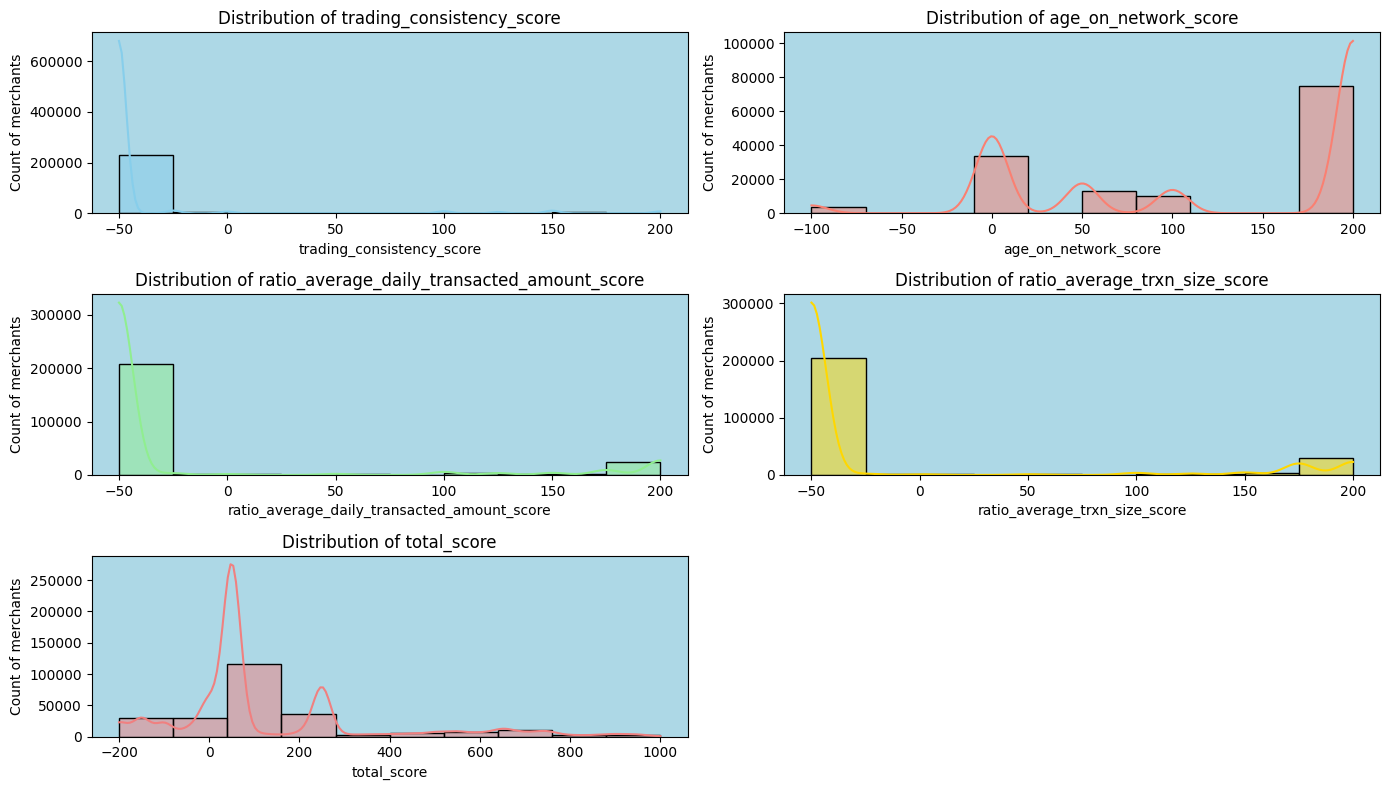

In [82]:
df_encoded_data1=df_encoded_data
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
score_columns = [col for col in df_encoded_data1.columns if "score" in col.lower() and col!="days_since_last_transaction_score"]
num_columns = 2
num_rows = (len(score_columns) + 1) // num_columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(14, 8))
axes = axes.flatten()
bg_color = 'lightblue'
bar_colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'deepskyblue']
for i, (col, color) in enumerate(zip(score_columns, bar_colors)):
    # Display summary statistics
#     print(df_encoded_data1[col].describe().T)
    sns.histplot(df_encoded_data1[col], kde=True, bins=10, color=color, ax=axes[i])
    axes[i].set_facecolor(bg_color)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count of merchants')
for i in range(len(score_columns), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [83]:
## is_qualified flag to incorporate

In [94]:


def summary(df_encoded_data1):
    Total_Scored =df_encoded_data1.shape[0]
    
    total_qualified_21 = df_encoded_data1[(df_encoded_data1['pilot_final_21_day_limit_on_6_months']>500000)&(df_encoded_data1["total_score"]>=800)].shape[0]

    percent_qualified_21 =round((total_qualified_21/df_encoded_data1['pilot_final_21_day_limit_on_6_months'].shape[0]*100),2)
    total_value_21=df_encoded_data1[(df_encoded_data1['pilot_final_21_day_limit_on_6_months']>500000)&(df_encoded_data1["total_score"]>=800)]['pilot_final_21_day_limit_on_6_months'].sum()
    Total_score_qualified_not_on_limits_21_day = df_encoded_data1[(df_encoded_data1['pilot_final_21_day_limit_on_6_months']<500000)&(df_encoded_data1["total_score"]>=800)].shape[0]
    
    
    total_qualified_7 = df_encoded_data1[(df_encoded_data1['pilot_final_7_day_limit_on_6_months']>200000)&(df_encoded_data1["total_score"]>=800)].shape[0]

    percent_qualified_7 =round((total_qualified_7/df_encoded_data1['pilot_final_7_day_limit_on_6_months'].shape[0]*100),2)
    total_value_7=df_encoded_data1[(df_encoded_data1['pilot_final_7_day_limit_on_6_months']>200000)&(df_encoded_data1["total_score"]>=800)]['pilot_final_7_day_limit_on_6_months'].sum()
    Total_score_qualified_not_on_limits_7_day = df_encoded_data1[(df_encoded_data1['pilot_final_7_day_limit_on_6_months']>=200000)&(df_encoded_data1["total_score"]>=800)].shape[0]
    
    
#     total_qualified_1 = df_encoded_data1[(df_encoded_data1['pilot_final_1_day_limit_on_6_months']>50000)&(df_encoded_data1["total_score"]>=800)].shape[0]

#     percent_qualified_1 =round((total_qualified_1/df_encoded_data1['pilot_final_1_day_limit_on_6_months'].shape[0]*100),2)
#     total_value_1=df_encoded_data1[(df_encoded_data1['pilot_final_1_day_limit_on_6_months']>50000)&(df_encoded_data1["total_score"]>=800)]['pilot_final_1_day_limit_on_6_months'].sum()



    
    Summary  = {
    'Product': ['21_day_Product', '7_day_Product'],
    'Total_Scored': [Total_Scored,Total_Scored],
    'Global_limit': [total_value_21, total_value_7],
    'Total_with_Pilot_Limits': [total_qualified_21, total_qualified_7],
    # 'Qualified_on_total_score_not_on_limits':[Total_score_qualified_not_on_limits_21_day,Total_score_qualified_not_on_limits_7_day],
    '%_with_Pilot_limits': [percent_qualified_21, percent_qualified_7]
}

    data2_Summary_data = pd.DataFrame(Summary)
    
    return data2_Summary_data


data2_Summary_data=summary(df_encoded_data1)
# data2_Summary_data.to_csv("data1_scores_summary.csv")
data2_Summary_data

,Product,Total_Scored,Global_limit,Total_with_Pilot_Limits,%_with_Pilot_limits
0,21_day_Product,243935,5201897250.00,2247,0.92
1,7_day_Product,243935,2796693300.00,2452,1.01


In [104]:
#Tweaking Varibales

def summary(df_encoded_data1):
    Total_Scored =df_encoded_data1.shape[0]
    
    total_qualified_21_800 = df_encoded_data1[(df_encoded_data1['pilot_final_21_day_limit_on_6_months']>500000)&(df_encoded_data1["total_score"]>=800)].shape[0]
    total_qualified_21_750 = df_encoded_data1[(df_encoded_data1['pilot_final_21_day_limit_on_6_months']>500000)&(df_encoded_data1["total_score"]>=750)].shape[0]
    total_qualified_21_700 = df_encoded_data1[(df_encoded_data1['pilot_final_21_day_limit_on_6_months']>500000)&(df_encoded_data1["total_score"]>=700)].shape[0]
    total_qualified_21_600 = df_encoded_data1[(df_encoded_data1['pilot_final_21_day_limit_on_6_months']>500000)&(df_encoded_data1["total_score"]>=600)].shape[0]

    #percent_qualified_21 =round((total_qualified_21/df_encoded_data1['pilot_final_21_day_limit_on_6_months'].shape[0]*100),2)
    total_value_21=df_encoded_data1[(df_encoded_data1['pilot_final_21_day_limit_on_6_months']>500000)&(df_encoded_data1["total_score"]>=800)]['pilot_final_21_day_limit_on_6_months'].sum()
    Total_score_qualified_not_on_limits_21_day = df_encoded_data1[(df_encoded_data1['pilot_final_21_day_limit_on_6_months']<500000)&(df_encoded_data1["total_score"]>=800)].shape[0]
    
    
    total_qualified_7_800 = df_encoded_data1[(df_encoded_data1['pilot_final_7_day_limit_on_6_months']>200000)&(df_encoded_data1["total_score"]>=800)].shape[0]
    total_qualified_7_750 = df_encoded_data1[(df_encoded_data1['pilot_final_7_day_limit_on_6_months']>200000)&(df_encoded_data1["total_score"]>=750)].shape[0]
    total_qualified_7_700 = df_encoded_data1[(df_encoded_data1['pilot_final_7_day_limit_on_6_months']>200000)&(df_encoded_data1["total_score"]>=700)].shape[0]
    total_qualified_7_600 = df_encoded_data1[(df_encoded_data1['pilot_final_7_day_limit_on_6_months']>200000)&(df_encoded_data1["total_score"]>=600)].shape[0]
    
    #percent_qualified_7 =round((total_qualified_7/df_encoded_data1['pilot_final_7_day_limit_on_6_months'].shape[0]*100),2)
    total_value_7=df_encoded_data1[(df_encoded_data1['pilot_final_7_day_limit_on_6_months']>200000)&(df_encoded_data1["total_score"]>=800)]['pilot_final_7_day_limit_on_6_months'].sum()
    Total_score_qualified_not_on_limits_7_day = df_encoded_data1[(df_encoded_data1['pilot_final_7_day_limit_on_6_months']>=200000)&(df_encoded_data1["total_score"]>=800)].shape[0]
    
    
    Summary  = {
    'Product': ['21_day_Product', '7_day_Product'],
    'Total_Scored': [Total_Scored,Total_Scored],
    'Global_limit': [total_value_21, total_value_7],
    'Total_score=>800': [total_qualified_21_800, total_qualified_7_800],
    'Total_score=>750': [total_qualified_21_750, total_qualified_7_750],
    'Total_score=>700': [total_qualified_21_700, total_qualified_7_700],
    'Total_score=>600': [total_qualified_21_600, total_qualified_7_600]
    # 'Qualified_on_total_score_not_on_limits':[Total_score_qualified_not_on_limits_21_day,Total_score_qualified_not_on_limits_7_day],
    # '%_with_Pilot_limits': [percent_qualified_21, percent_qualified_7]
}

    data2_Summary_data = pd.DataFrame(Summary)
    
    return data2_Summary_data


data2_Summary_data_i=summary(df_encoded_data1)
# data2_Summary_data.to_csv("data1_scores_summary.csv")
data2_Summary_data_i

,Product,Total_Scored,Global_limit,Total_score=>800,Total_score=>750,Total_score=>700,Total_score=>600
0,21_day_Product,243935,5201897250.00,2247,2463,2623,2794
1,7_day_Product,243935,2796693300.00,2452,2703,2883,3095


In [115]:
#Tweaking Limit threshiolds

def summary(df_encoded_data1):
    Total_Scored =df_encoded_data1.shape[0]
    
    total_qualified_21_lim_500k = df_encoded_data1[(df_encoded_data1['pilot_final_21_day_limit_on_6_months']>500000)&(df_encoded_data1["total_score"]>=800)].shape[0]
    total_qualified_21_lim_400k = df_encoded_data1[(df_encoded_data1['pilot_final_21_day_limit_on_6_months']>400000)&(df_encoded_data1["total_score"]>=800)].shape[0]
    total_qualified_21_lim_350k = df_encoded_data1[(df_encoded_data1['pilot_final_21_day_limit_on_6_months']>350000)&(df_encoded_data1["total_score"]>=800)].shape[0]
    total_qualified_21_lim_300k = df_encoded_data1[(df_encoded_data1['pilot_final_21_day_limit_on_6_months']>300000)&(df_encoded_data1["total_score"]>=800)].shape[0]

    #percent_qualified_21 =round((total_qualified_21/df_encoded_data1['pilot_final_21_day_limit_on_6_months'].shape[0]*100),2)
    total_value_21=df_encoded_data1[(df_encoded_data1['pilot_final_21_day_limit_on_6_months']>500000)&(df_encoded_data1["total_score"]>=800)]['pilot_final_21_day_limit_on_6_months'].sum()
    Total_score_qualified_not_on_limits_21_day = df_encoded_data1[(df_encoded_data1['pilot_final_21_day_limit_on_6_months']<500000)&(df_encoded_data1["total_score"]>=800)].shape[0]
    
    
    total_qualified_7_lim_200k = df_encoded_data1[(df_encoded_data1['pilot_final_7_day_limit_on_6_months']>200000)&(df_encoded_data1["total_score"]>=800)].shape[0]
    total_qualified_7_lim_150k = df_encoded_data1[(df_encoded_data1['pilot_final_7_day_limit_on_6_months']>150000)&(df_encoded_data1["total_score"]>=800)].shape[0]
    total_qualified_7_lim_125k = df_encoded_data1[(df_encoded_data1['pilot_final_7_day_limit_on_6_months']>125000)&(df_encoded_data1["total_score"]>=800)].shape[0]
    total_qualified_7_lim_100k= df_encoded_data1[(df_encoded_data1['pilot_final_7_day_limit_on_6_months']>100000)&(df_encoded_data1["total_score"]>=800)].shape[0]
    
    #percent_qualified_7 =round((total_qualified_7/df_encoded_data1['pilot_final_7_day_limit_on_6_months'].shape[0]*100),2)
    total_value_7=df_encoded_data1[(df_encoded_data1['pilot_final_7_day_limit_on_6_months']>200000)&(df_encoded_data1["total_score"]>=800)]['pilot_final_7_day_limit_on_6_months'].sum()
    Total_score_qualified_not_on_limits_7_day = df_encoded_data1[(df_encoded_data1['pilot_final_7_day_limit_on_6_months']>=200000)&(df_encoded_data1["total_score"]>=800)].shape[0]
    
    
    Summary  = {
    'Product': ['21_day_Product', '7_day_Product'],
    'Total_Scored': [Total_Scored,Total_Scored],
    'Global_limit': [total_value_21, total_value_7],
    'Total_21@500k_7@200k': [total_qualified_21_lim_500k, total_qualified_7_lim_200k],
    'Total_21@400k_7@150k': [total_qualified_21_lim_400k, total_qualified_7_lim_150k],
    'Total_21@350k_7@125k': [total_qualified_21_lim_350k, total_qualified_7_lim_125k],
    'Total_21@300k_7@100k': [total_qualified_21_lim_300k, total_qualified_7_lim_100k]
    # 'Qualified_on_total_score_not_on_limits':[Total_score_qualified_not_on_limits_21_day,Total_score_qualified_not_on_limits_7_day],
    # '%_with_Pilot_limits': [percent_qualified_21, percent_qualified_7]
}

    data2_Summary_data = pd.DataFrame(Summary)
    
    return data2_Summary_data


data2_Summary_data_x=summary(df_encoded_data1)
# data2_Summary_data.to_csv("data1_scores_summary.csv")
data2_Summary_data_x

,Product,Total_Scored,Global_limit,Total_21@500k_7@200k,Total_21@400k_7@150k,Total_21@350k_7@125k,Total_21@300k_7@100k
0,21_day_Product,243935,5201897250.00,2247,5297,5297,5297
1,7_day_Product,243935,2796693300.00,2452,5297,5297,5297
